# Lending Club Case Study

##### Group Members: 
1. Gaurav Gupta
2. Shreyash kumar Nangnurwar

## Exploratory Data Analysis

In [378]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [379]:
#This library will hide all the warning in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [380]:
#Loading loan data file
loan = pd.read_csv('loan.csv')
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [381]:
#Checking shape of dataset
loan.shape

(39717, 111)

In [382]:
#Checking the details of data set
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [383]:
#Checking column data types
loan.dtypes.head(10)

id                   int64
member_id            int64
loan_amnt            int64
funded_amnt          int64
funded_amnt_inv    float64
term                object
int_rate            object
installment        float64
grade               object
sub_grade           object
dtype: object

## Data Cleaning

In [384]:
#Missing values per column
null_values = round(((loan.isnull().sum()/len(loan.id))*100),2)
null_values[null_values > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

There are many columns where many values are missing, even some colums have all values null. Hence we will drop those columns where missing values are more than 50%

In [385]:
#Lets check the number of columns where missing values are more than or equal to 50%
null_values_columns = list(null_values[null_values >= 50].index)
print(len(null_values_columns))

57


There were 57 columns which has more than 50% missing values. So we will drops these columns

In [386]:
#Droping colums width missing values
loan = loan.drop(null_values_columns,axis=1)
loan.shape

(39717, 54)

In [387]:
#Again checking missing values per column
null_values = round(((loan.isnull().sum()/len(loan.id))*100),2)
null_values[null_values > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

We can see that 'desc' column has more than 32% of missing values. So we can also drop that column.

In [388]:
#Droping 'desc' column
loan = loan.drop('desc',axis=1)
loan.shape

(39717, 53)

In [389]:
#Again checking missing values per column
null_values = round(((loan.isnull().sum()/len(loan.id))*100),2)
null_values[null_values > 0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

As we can see in the excel file that many values are repeated in each columms. So we will try to find uniques values in each column.

In [390]:
#Finding number of unique values in each vcolumn
loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

There are many columns which only one unique value in all the rows, which will not give any usefull information for our usecase. Hence we will drop these columns

In [391]:
#Dropping Columns with only one values.
loan = loan.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1)
loan.shape

(39717, 44)

'id', 'url', and 'member_id' having all unique values which means any one of these can be used as primary key.
Let's use **id** primary key and remove url and member id columns.

In [392]:
#Dropping 'id', 'url', and 'member_id' columns
loan = loan.drop(['member_id', 'url'], axis=1)
loan.shape

(39717, 42)

'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv' variables are valid for barrowers who already took loan. As we are only interested only in loan application details these columns can be removed.

In [393]:
#Dropping 'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv' columns
loan = loan.drop(['out_prncp', 'out_prncp_inv', 'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1)
loan.shape

(39717, 33)

In [394]:
#Again checking missing values per column
null_values = round(((loan.isnull().sum()/len(loan.id))*100),2)
null_values[null_values > 0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

Now we have 5 colums with some missing values. So we will remove the rows with null values for these columns.

In [395]:
#Removing null rows
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [396]:
#Again checking missing values per column
null_values = round(((loan.isnull().sum()/len(loan.id))*100),2)
null_values[null_values > 0]

Series([], dtype: float64)

In [397]:
#Shape of cleaned data
loan.shape

(36493, 33)

So now all the missing valuers are removed. So we are good to go for further data analysis.

In [398]:
#Checking datatypes of colums
loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pym

'int_rate' and 'revol_util' are having '%' symbol values and having data type of object. Let's remove % at the end and convert to float

In [399]:
#stripping '%' value
loan['int_rate'] = loan.int_rate.str.strip('%').astype(float)
loan['revol_util'] = loan.revol_util.str.strip('%').astype(float)

In [400]:
#converting to date type
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
loan['issue_d'] = loan['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

loan['earliest_cr_line'] = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [401]:
# Converted to proper datatypes for analysis
loan.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                  

Now we will create new columns from date columns

In [402]:
#issue_d column
loan['issue_d_year'] = loan.issue_d.dt.year
loan['issue_d_month'] = loan.issue_d.dt.strftime('%b')
loan['issue_d_weekday'] = loan.issue_d.dt.weekday
#data type conversion of year and weekday
loan['issue_d_year'] = loan['issue_d_year'].astype(object)
loan['issue_d_weekday'] = loan['issue_d_weekday'].astype(object)

#earliest_cr_line
loan['earliest_cr_line_year'] = loan.earliest_cr_line.dt.year
loan['earliest_cr_line_month'] = loan.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
loan['earliest_cr_line_year'] = loan['earliest_cr_line_year'].astype(object)

Creating Approved Loan amount ratio which is a ratio of Funded Amount by investor to Requested Loan amount.

In [403]:
loan['approved_loan_amnt_ratio'] = round(loan.funded_amnt_inv*100/loan.loan_amnt,2)

In [404]:
loan.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
1  1077430       2500         2500           2500.0   60 months     15.27   
3  1076863      10000        10000          10000.0   36 months     13.49   
4  1075358       3000         3000           3000.0   60 months     12.69   
5  1075269       5000         5000           5000.0   36 months      7.90   
6  1069639       7000         7000           7000.0   60 months     15.96   

   installment grade sub_grade                  emp_title  ... total_pymnt  \
1        59.83     C        C4                      Ryder  ...     1008.71   
3       339.31     C        C1        AIR RESOURCES BOARD  ...    12231.89   
4        67.79     B        B5   University Medical Group  ...     3513.33   
5       156.46     A        A4       Veolia Transportaton  ...     5632.21   
6       170.08     C        C5  Southern Star Photography  ...    10110.84   

  total_pymnt_inv  last_pymnt_amnt pub_rec_bankruptcies issue_d_year  \
1         1008.71           119.66                  0.0         2011   
3        12231.89           357.48                  0.0         2011   
4         3513.33            67.79                  0.0         2011   
5         5632.21           161.03                  0.0         2011   
6        10110.84          1313.76                  0.0         2011   

  issue_d_month issue_d_weekday earliest_cr_line_year earliest_cr_line_month  \
1           Dec               3                  1999                    Apr   
3           Dec               3                  1996                    Feb   
4           Dec               3                  1996                    Jan   
5           Dec               3                  2004                    Nov   
6           Dec               3                  2005                    Jul   

  approved_loan_amnt_ratio  
1                    100.0  
3                    100.0  
4                    100.0  
5                    100.0  
6                    100.0  

[5 rows x 39 columns]

In [405]:
# Converted date formats for analysis
loan.dtypes

id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_title                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
title                               object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6m

## Univariate Analysis

### Loan Amount

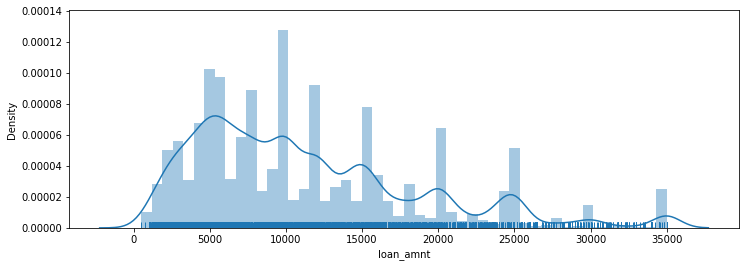

In [406]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Histogram plot
sns.distplot(a=loan.loan_amnt, rug=True)
plt.show()

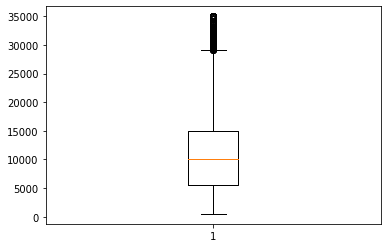

In [407]:
#Box plot
plt.boxplot(x=loan.loan_amnt)
plt.show()

In [408]:
#laon amount description
loan['loan_amnt'].describe()

count    36493.000000
mean     11303.407503
std       7435.228578
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Observations -
From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

### funded_amnt_inv
The total amount committed by investors for that loan at that point in time.

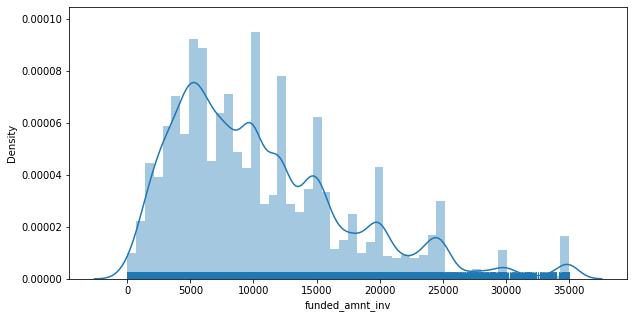

In [409]:
plt.figure(figsize=(10,5))
sns.distplot(a=loan.funded_amnt_inv, rug=True)
plt.show()

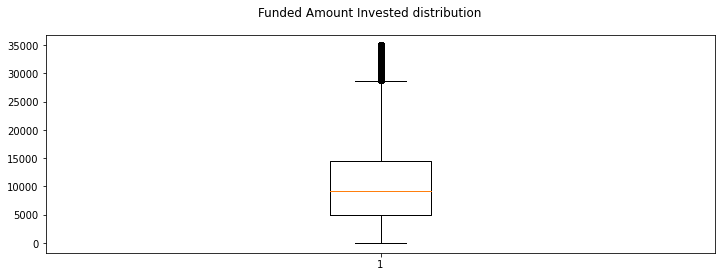

In [410]:
plt.figure(figsize=(12,4))
plt.boxplot(x=loan.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [411]:
loan.funded_amnt_inv.describe()

count    36493.000000
mean     10595.848578
std       7072.904268
min          0.000000
25%       5000.000000
50%       9200.000000
75%      14500.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

**Observations:**  
Funded amount investment data behaves similar to loan Amount, Which tells us that Lending club approved atmost of Applied loan amount.

### Approved Loan Amount Ratio

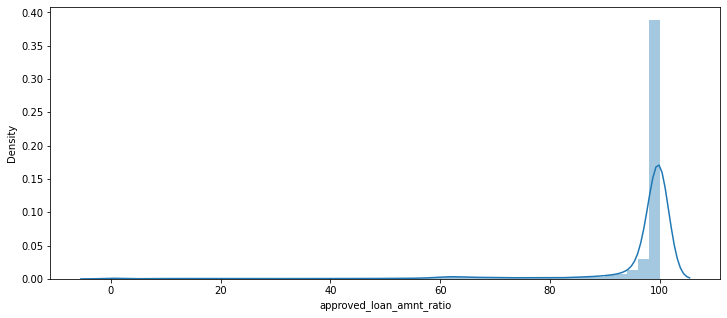

In [412]:
plt.figure(figsize=(12,5))
sns.distplot(a=loan.approved_loan_amnt_ratio)
plt.show()

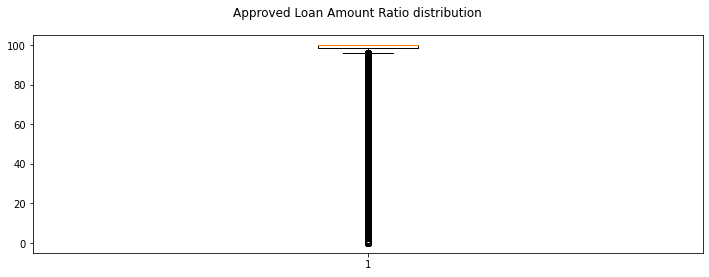

In [413]:
plt.figure(figsize=(12,4))
plt.boxplot(x=loan.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

In [414]:
loan.approved_loan_amnt_ratio.describe()

count    36493.000000
mean        94.907616
std         14.811744
min          0.000000
25%         98.430000
50%         99.960000
75%        100.000000
max        100.000000
Name: approved_loan_amnt_ratio, dtype: float64

**Observations**:
70% of Borrowers got 100% loan amount from investors.

### Interest Rate

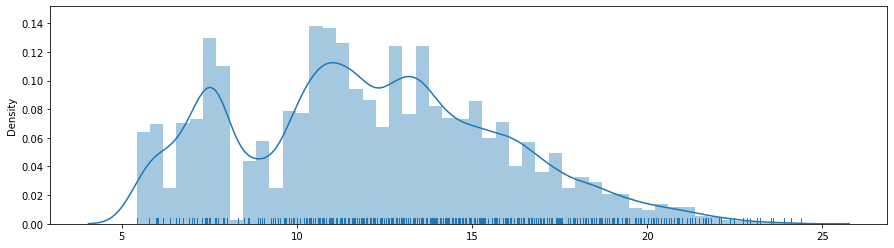

In [415]:
plt.figure(figsize=(15,4))
sns.distplot(x=loan.int_rate, rug=True)
plt.show()

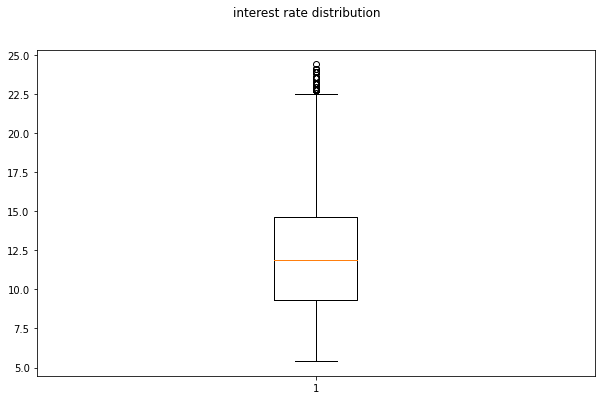

In [416]:
plt.figure(figsize=(10,6))
plt.boxplot(x=loan.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

In [417]:
loan.int_rate.describe()

count    36493.000000
mean        12.076924
std          3.734800
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

**Observations**:<br>
From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between **9% to 14.5%**. Some people took loan at higher rates of interest i.e., **22.5%**

### Installment
The monthly payment owed by the borrower if the loan originates.

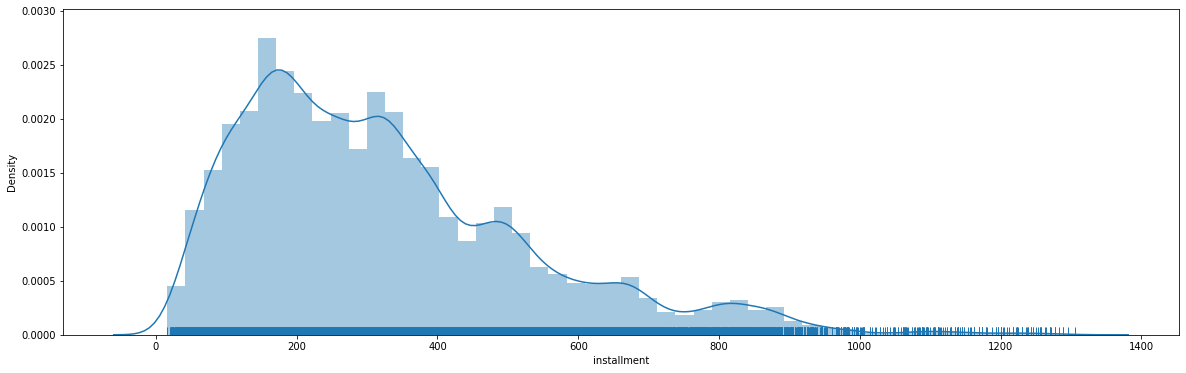

In [418]:
plt.figure(figsize=(20,6))
sns.distplot(a=loan.installment, rug=True)
plt.show()

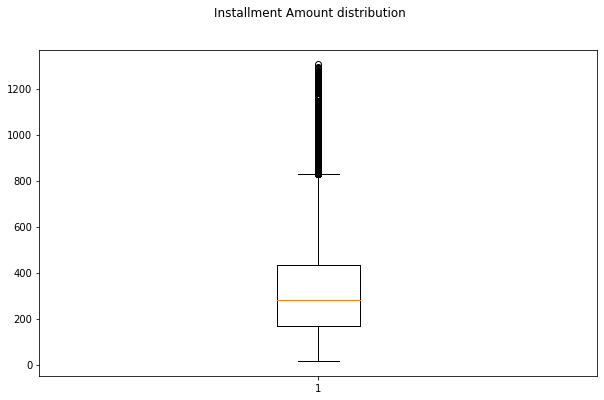

In [419]:
plt.figure(figsize=(10,6))
plt.boxplot(x=loan.installment)
plt.suptitle('Installment Amount distribution')
plt.show()

In [420]:
loan.installment.describe()

count    36493.000000
mean       326.086509
std        207.436275
min         16.080000
25%        168.860000
50%        283.200000
75%        432.090000
max       1305.190000
Name: installment, dtype: float64

**Observations**:<br>
The Most representative value of Installment amount in around 283.

# annual_inc
The self-reported annual income provided by the borrower during registration.

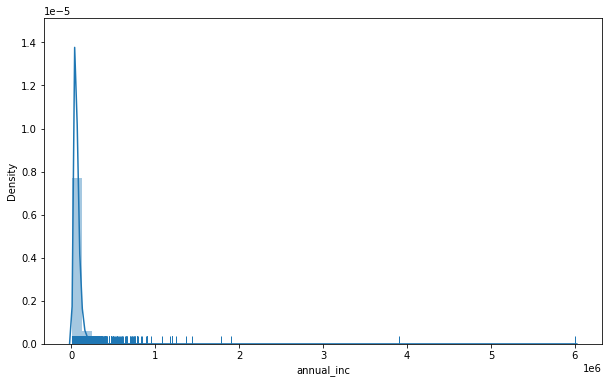

In [421]:
plt.figure(figsize=(10,6))
sns.distplot(a=loan.annual_inc, rug=True)
plt.show()

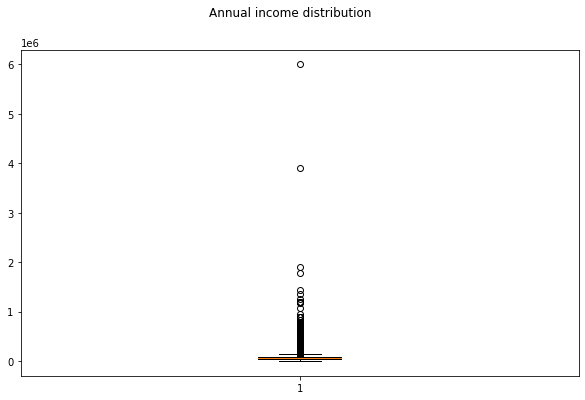

In [422]:
plt.figure(figsize=(10,6))
plt.boxplot(x=loan.annual_inc)
plt.suptitle('Annual income distribution')
plt.show()

In [423]:
loan.annual_inc.describe()

count    3.649300e+04
mean     6.926911e+04
std      6.350285e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

**Observations**:<br>
Around 361 people are having more the 235000 annual income. and 99% of people are having incomes below 235000.

# dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

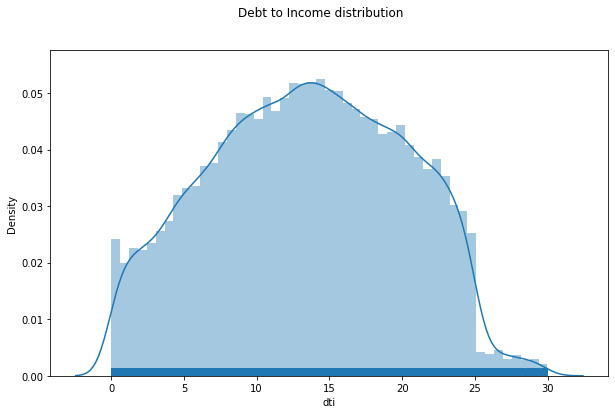

In [424]:
plt.figure(figsize=(10,6))
sns.distplot(a=loan.dti, rug=True)
plt.suptitle('Debt to Income distribution')
plt.show()

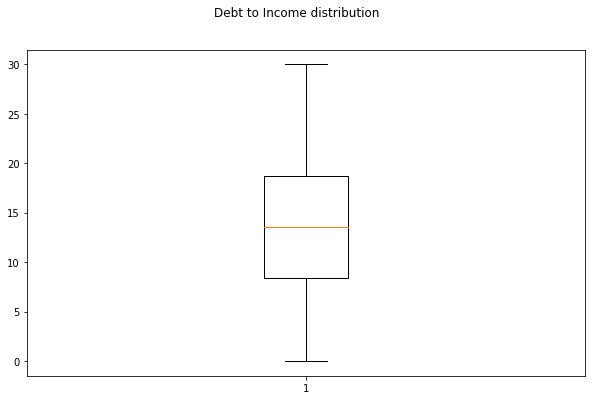

In [425]:
plt.figure(figsize=(10,6))
plt.boxplot(x=loan.dti)
plt.suptitle('Debt to Income distribution')
plt.show()

In [426]:
loan.dti.describe()

count    36493.000000
mean        13.442337
std          6.643702
min          0.000000
25%          8.350000
50%         13.540000
75%         18.690000
max         29.990000
Name: dti, dtype: float64

**Observations**:<br>
Looks like there are no outliers and the distribution is very much similar to normal distribution.
This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

## Pub rec
Number of Public derogatory records

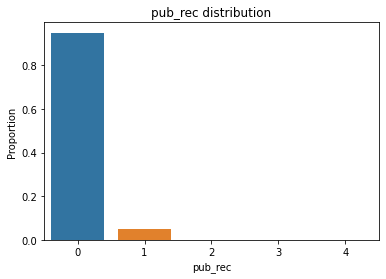

In [427]:
#Percentage of each values
prob_df = loan['pub_rec'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='pub_rec', data=prob_df)
plt.xlabel('pub_rec')
plt.ylabel('Proportion')
plt.title('pub_rec distribution')
plt.show()

Observations -
Around 90% borrower's are having no public derogatory records.

# pub_rec_bankruptcies
Number of public record bankruptcies

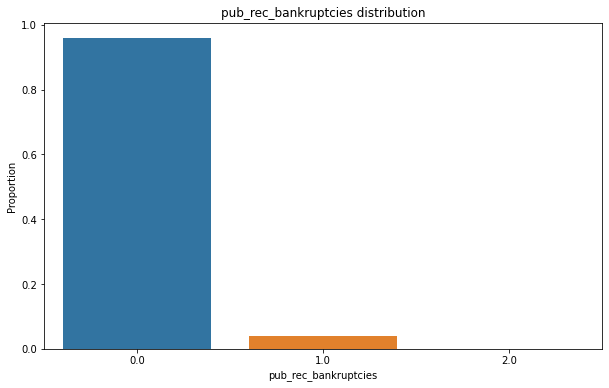

In [428]:
#Percentage of each values
prob_df = loan['pub_rec_bankruptcies'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index', y='pub_rec_bankruptcies', data=prob_df)
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Proportion')
plt.title('pub_rec_bankruptcies distribution')
plt.show()

**Observations**:<br>
99% people have not went bankrupt.

### Loan issue date (issue_d)

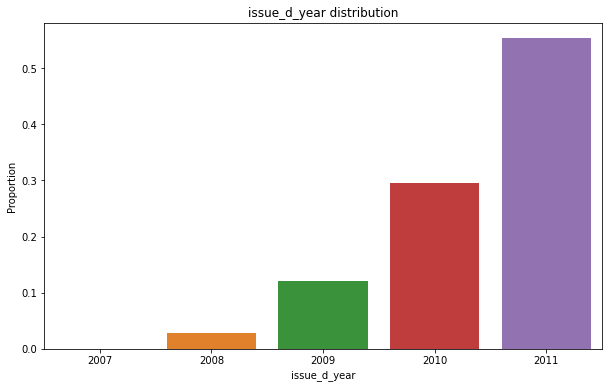

In [429]:
#Percentage of each values
prob_df = loan['issue_d_year'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index', y='issue_d_year', data=prob_df)
plt.xlabel('issue_d_year')
plt.ylabel('Proportion')
plt.title('issue_d_year distribution')
plt.show()

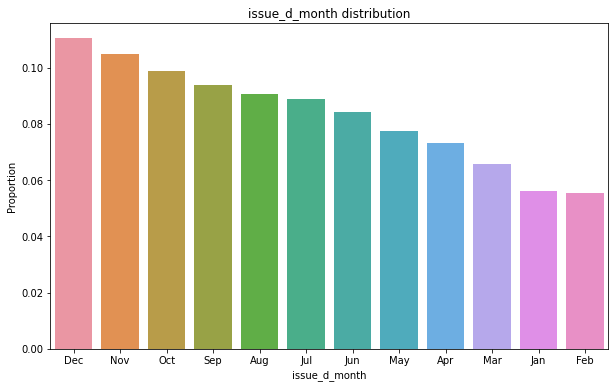

In [430]:
#Percentage of each values
prob_df = loan['issue_d_month'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index', y='issue_d_month', data=prob_df)
plt.xlabel('issue_d_month')
plt.ylabel('Proportion')
plt.title('issue_d_month distribution')
plt.show()

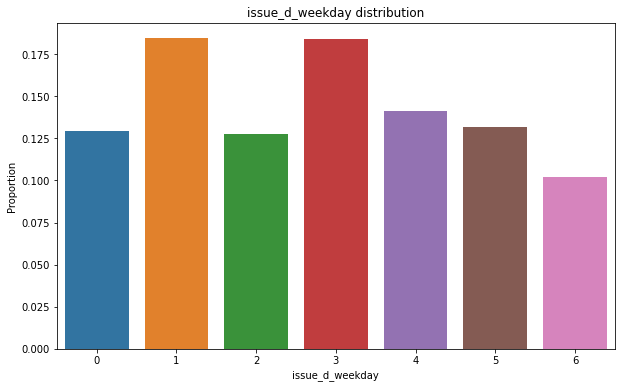

In [431]:
#Percentage of each values
prob_df = loan['issue_d_weekday'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index', y='issue_d_weekday', data=prob_df)
plt.xlabel('issue_d_weekday')
plt.ylabel('Proportion')
plt.title('issue_d_weekday distribution')
plt.show()

**Observations**:<br>
The lending club(LC) has doubling loan issues every year. <br>
There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec. <br>
LC has issued more loans on tuesday and wednessday than other week days.

### Erliest Credit line (earliest_cr_line)

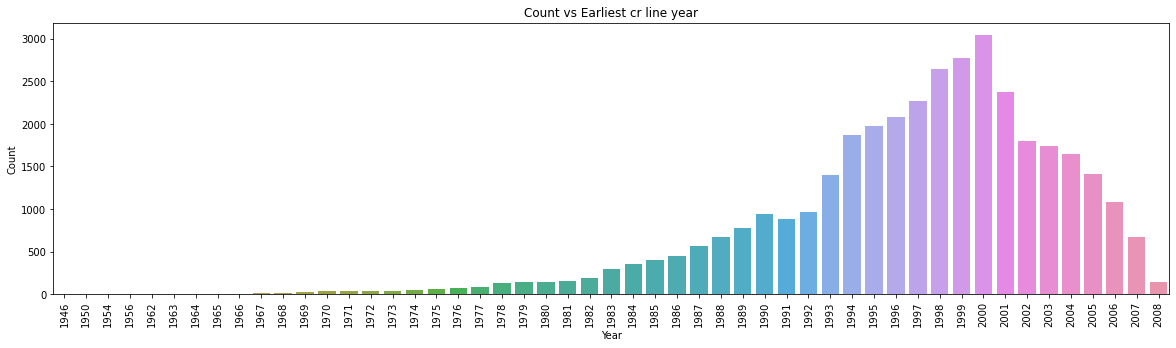

In [432]:
plt.figure(figsize=(20,5))
sns.countplot(loan.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

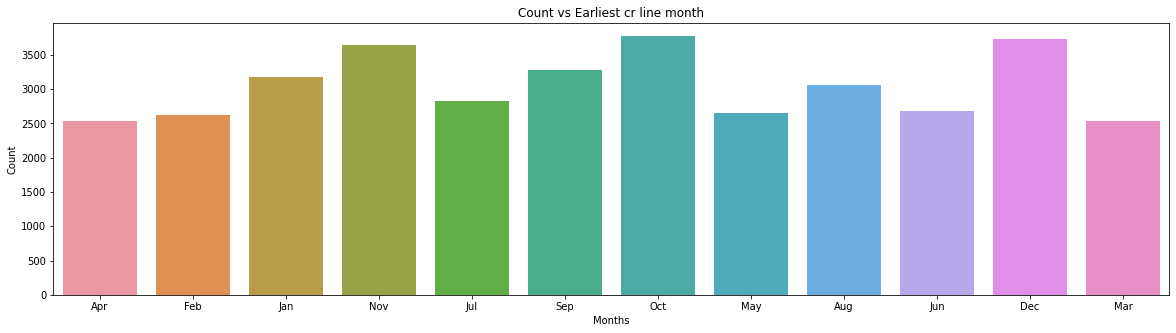

In [433]:
plt.figure(figsize=(20,5))
sns.countplot(loan.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

**Observations**:  
Many of Loan borrowers of LC have got earlier credit line in 2000 year, and also most have got earlier credit line on end of the year i.e., Oct, Nov, Dec

### Term

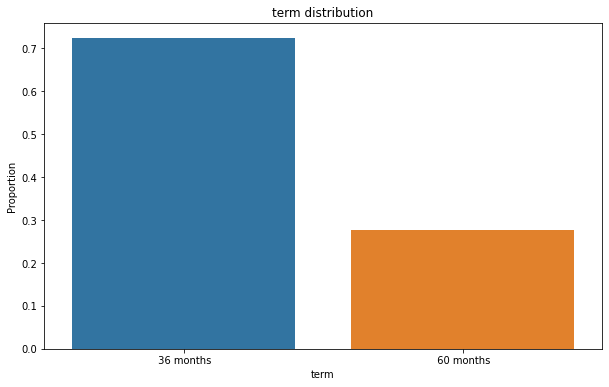

In [434]:
#Probability / Percentage of each values
prob_df = loan['term'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index', y='term', data=prob_df)
plt.xlabel('term')
plt.ylabel('Proportion')
plt.title('term distribution')
plt.show()

**Observations**:<br>
Barrowrs have taken 36 months tenure more than 60 months.


### Grade

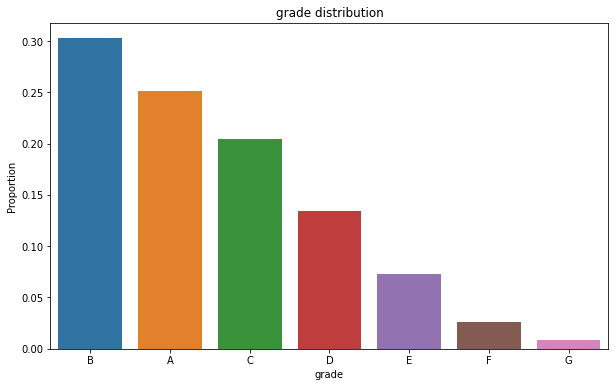

In [435]:
#Probability / Percentage of each values
prob_df = loan['grade'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index', y='grade', data=prob_df)
plt.xlabel('grade')
plt.ylabel('Proportion')
plt.title('grade distribution')
plt.show()

**Observations**: <br>
Most borrowers fall under A and B grades then other grades

###  Sub Grade

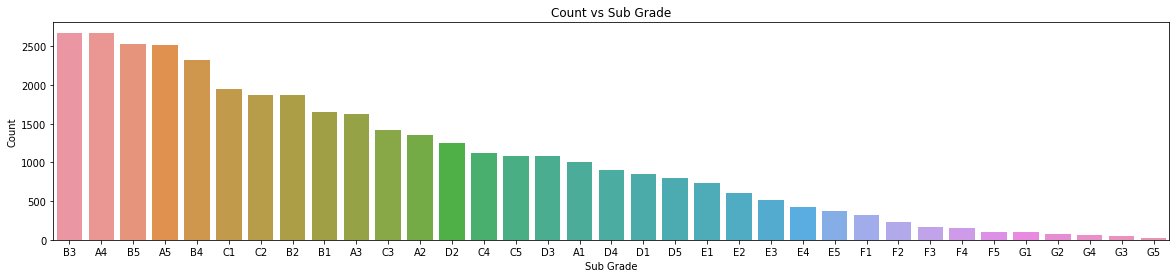

In [436]:
plt.figure(figsize=(20,4))
sns.countplot(loan.sub_grade, order=loan.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

### Employment length

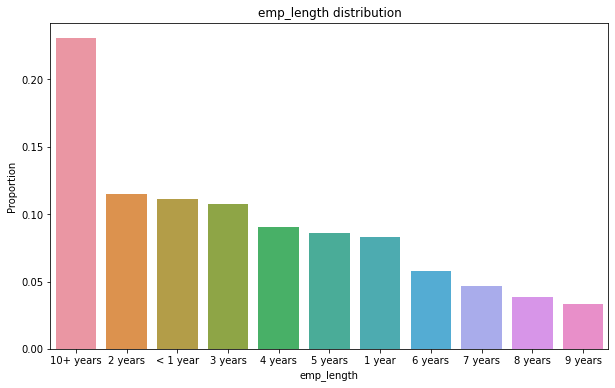

In [437]:
#Probability / Percentage of each values
prob_df = loan['emp_length'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index', y='emp_length', data=prob_df)
plt.xlabel('emp_length')
plt.ylabel('Proportion')
plt.title('emp_length distribution')
plt.show()

**Observations**:<br>
Borrowers are mostly 10+ years emploment length.

### Home Ownership

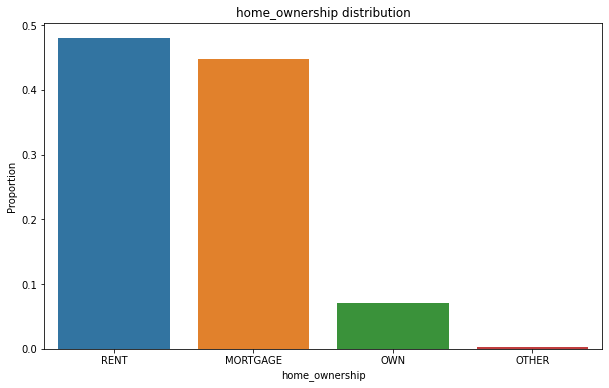

In [438]:
#Probability / Percentage of each values
prob_df = loan['home_ownership'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index', y='home_ownership', data=prob_df)
plt.xlabel('home_ownership')
plt.ylabel('Proportion')
plt.title('home_ownership distribution')
plt.show()

**Observations**:<br>
The loan borrowers are mostly having rented and mortgage houses.

### Verification Status

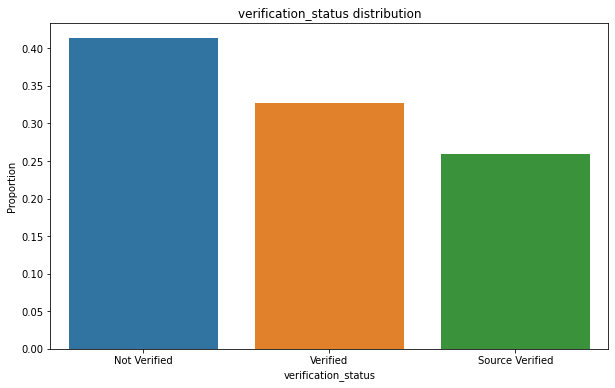

In [439]:
#Probability / Percentage of each values
prob_df = loan['verification_status'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index', y='verification_status', data=prob_df)
plt.xlabel('verification_status')
plt.ylabel('Proportion')
plt.title('verification_status distribution')
plt.show()

**Observations**:<br>
Majority of loans were given without verification of applicants income.

### Loan Status

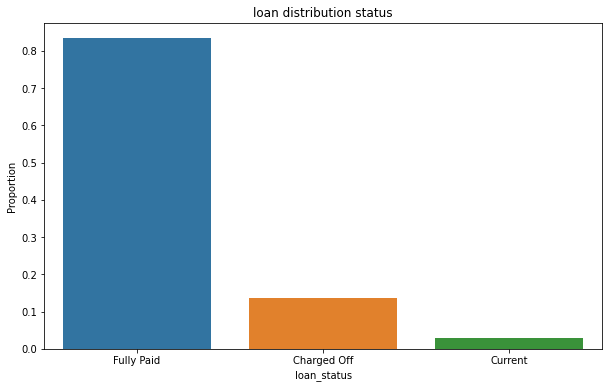

In [440]:
#Probability / Percentage of each values
prob_df = loan['loan_status'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index', y='loan_status', data=prob_df)
plt.xlabel('loan_status')
plt.ylabel('Proportion')
plt.title('loan distribution status')
plt.show()

**Observations**:<br>
85% of borrowers has paid the loan fully. where are 14% are defaulted the loan.

### Purpose

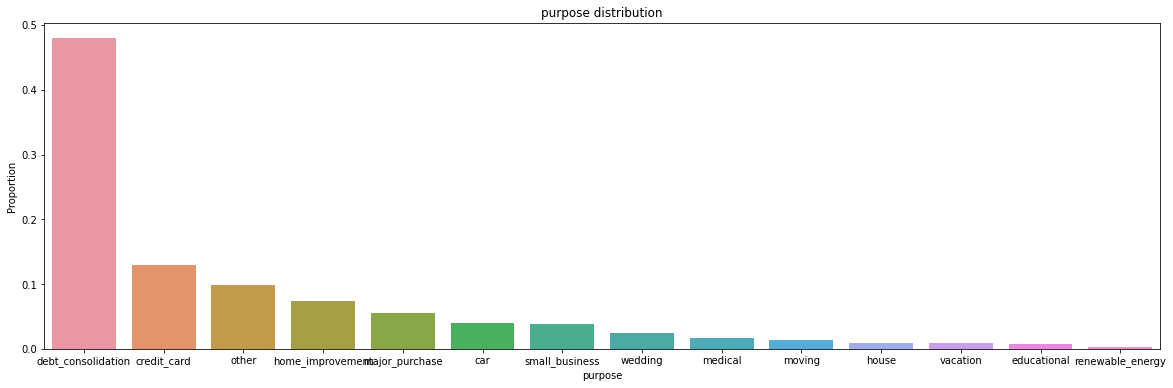

In [441]:
#Probability / Percentage of each values
prob_df = loan['purpose'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x='index', y='purpose', data=prob_df)
plt.xlabel('purpose')
plt.ylabel('Proportion')
plt.title('purpose distribution')
plt.show()

**Observations**:<br>
Looks line more number of people took loan for _debt consolidation_ and a very few people took for _renewable energy_

### Borrower's State (add_state)

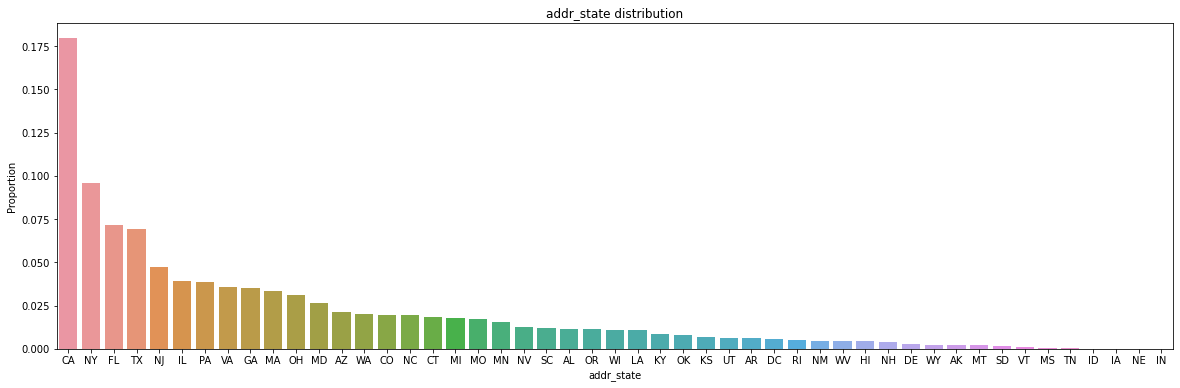

In [442]:
#Probability / Percentage of each values
prob_df = loan['addr_state'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x='index', y='addr_state', data=prob_df)
plt.xlabel('addr_state')
plt.ylabel('Proportion')
plt.title('addr_state distribution')
plt.show()

**Observations**:<br>
Most of the borrowers are from _CA_ and _NY_

## Segmented Univariate Analysis

### Loan Amount

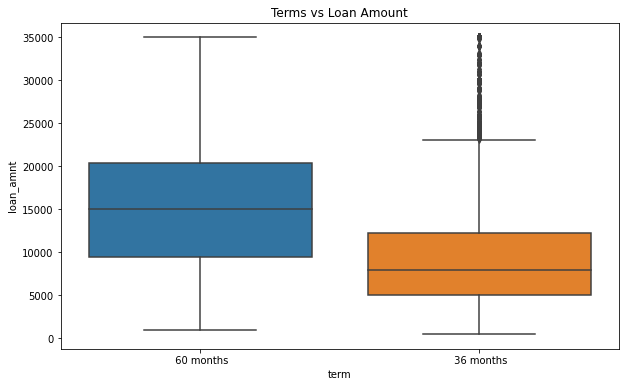

In [443]:
plt.figure(figsize=(10,6))
sns.boxplot(x='term', y=loan.loan_amnt, data=loan)
plt.title('Terms vs Loan Amount')
plt.show()

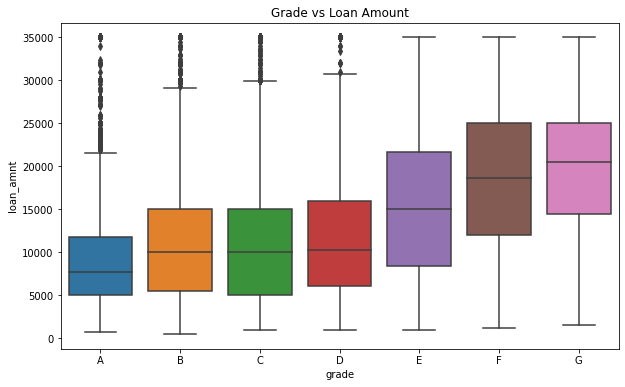

In [444]:
#Finding grades with sorted alphabetical order
plt.figure(figsize=(10,6))
plt.title('Grade vs Loan Amount')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.loan_amnt, order = grade_ord, data=loan)
plt.show()

**Observations**:<br>
Higher amount loans have high tenure i.e, 60 months.  
Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

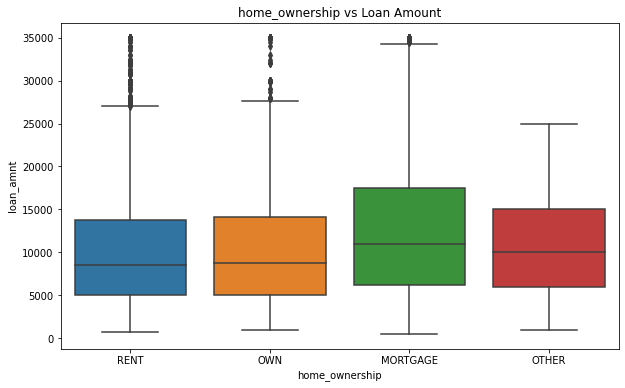

In [445]:
plt.figure(figsize=(10,6))
sns.boxplot(x='home_ownership', y=loan.loan_amnt, data=loan)
plt.title('home_ownership vs Loan Amount')
plt.show()

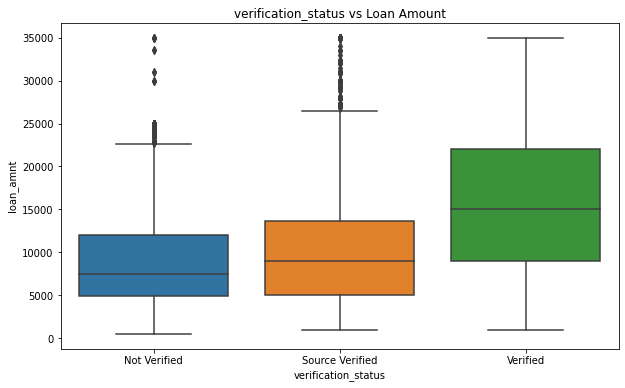

In [446]:
plt.figure(figsize=(10,6))
plt.title('verification_status vs Loan Amount')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.loan_amnt, order = verification_status_ord, data=loan)
plt.show()

**Observations**:<br>
more borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.  
And most of borrowers are verified for borrowing loan >9k

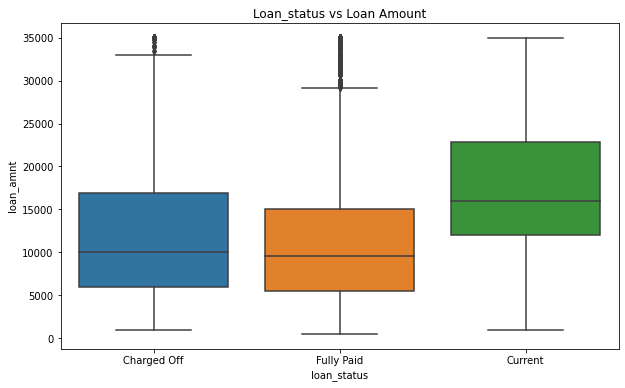

In [447]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y=loan.loan_amnt, data=loan)
plt.title('Loan_status vs Loan Amount')
plt.show()

**Observations**:<br>
Charged Off loans have higher amounts than Fully Paid ones.

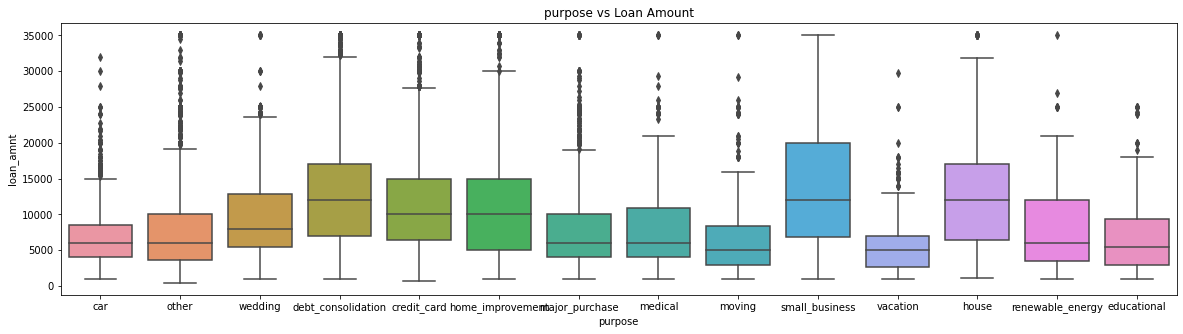

In [448]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.loan_amnt, data=loan)
plt.title('purpose vs Loan Amount')
plt.show()

**Observations**:  
More loan amount is from Small bussiness followed by debt consolidation.

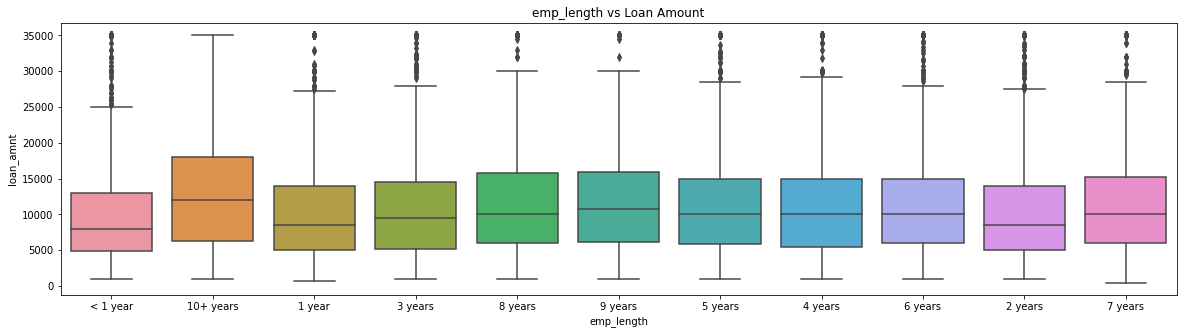

In [449]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.loan_amnt, data=loan)
plt.title('emp_length vs Loan Amount')
plt.show()

**Observations**:  
more borrowers are from 10+ years and least is <1 year

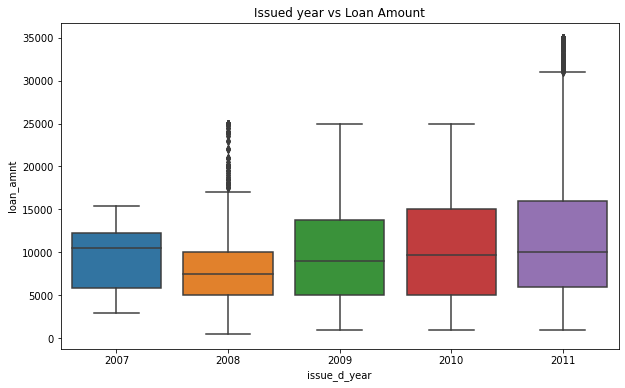

In [450]:
#Issue_d
plt.figure(figsize=(10,6))
sns.boxplot(x=loan.issue_d_year, y=loan.loan_amnt, data=loan)
plt.title('Issued year vs Loan Amount')
plt.show()

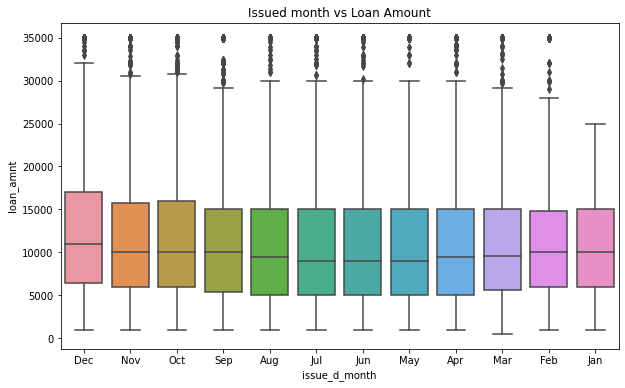

In [451]:
plt.figure(figsize=(10,6))
sns.boxplot(x=loan.issue_d_month, y=loan.loan_amnt, data=loan)
plt.title('Issued month vs Loan Amount')
plt.show()

**Observations**:<br>
* The meadian loan amount in each year did not change much but the distribution is more spread as the years increase, which means people have taken different loan amounts in each year.  
* Few Loan borrowers took heigher loan amount in 2008 and 2011 which are plotted as ouliers.<br>
* Loan borrowers took almost similar amounts in all the months except in December, people have taken heigher amounts as distribution is high above median.

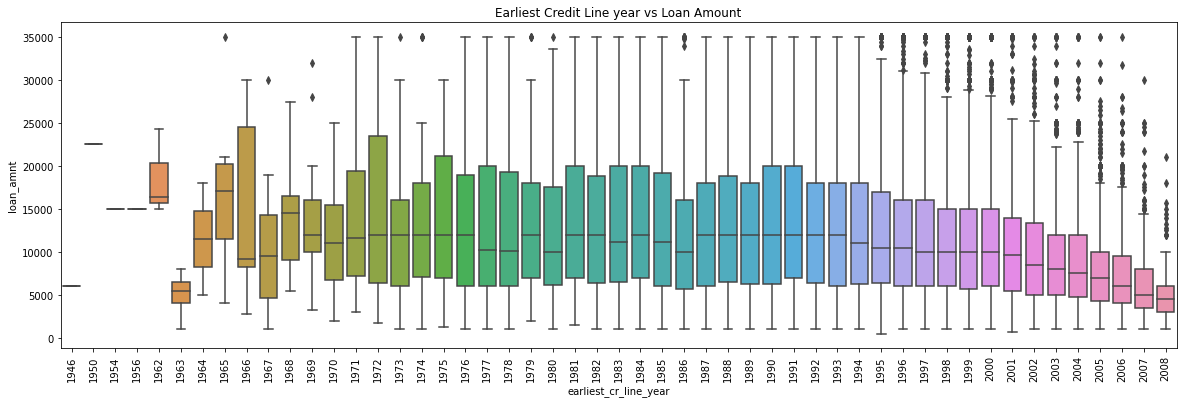

In [452]:
#earliest_cr_line
plt.figure(figsize=(20,6))
sns.boxplot(x=loan.earliest_cr_line_year, y=loan.loan_amnt, data=loan)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount')
plt.show()

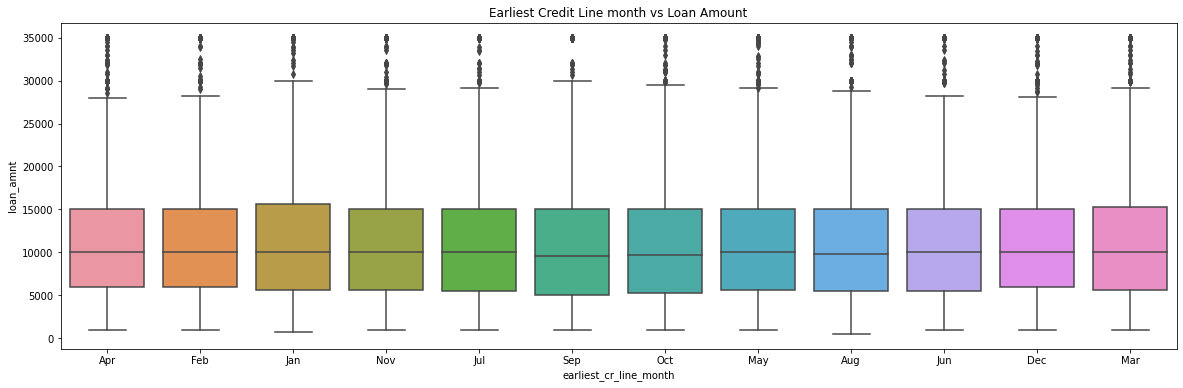

In [453]:
plt.figure(figsize=(20,6))
sns.boxplot(x=loan.earliest_cr_line_month, y=loan.loan_amnt, data=loan)
plt.title('Earliest Credit Line month vs Loan Amount')
plt.show()

**Observations**:<br>
Borrowers who go earliest credit line in 1966 got wide spreaded amount of loans than others.

### funded_amnt

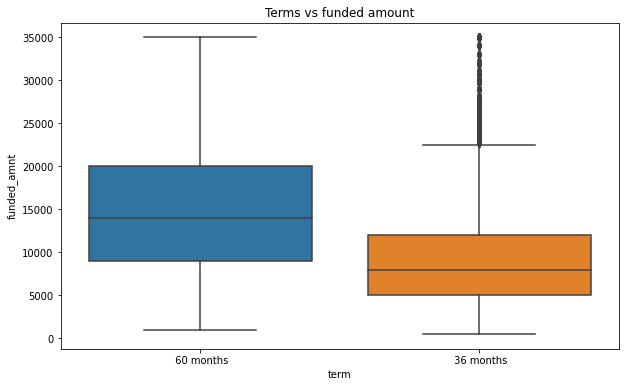

In [454]:
plt.figure(figsize=(10,6))
sns.boxplot(x='term', y=loan.funded_amnt, data=loan)
plt.title('Terms vs funded amount')
plt.show()

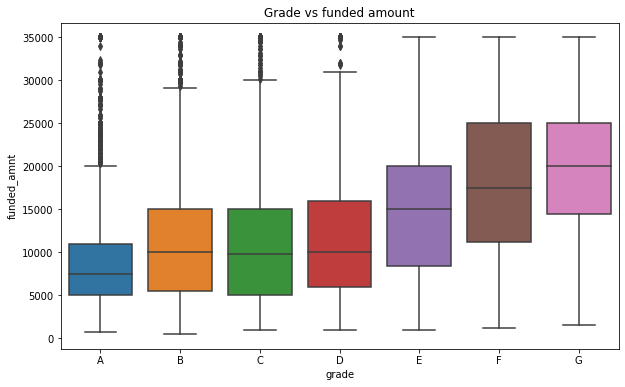

In [455]:
plt.figure(figsize=(10,6))
plt.title('Grade vs funded amount')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.funded_amnt, order = grade_ord, data=loan)
plt.show()

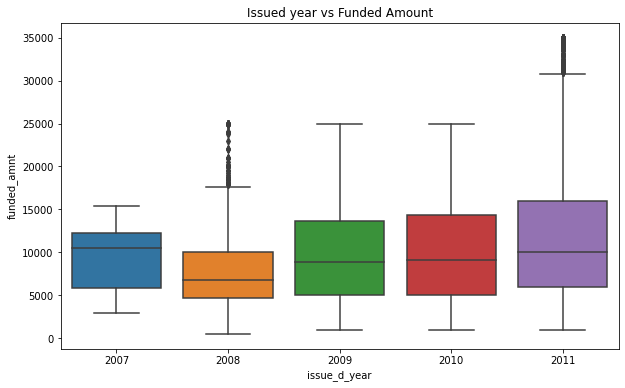

In [456]:
#Issue_d
plt.figure(figsize=(10,6))
sns.boxplot(x=loan.issue_d_year, y=loan.funded_amnt, data=loan)
plt.title('Issued year vs Funded Amount')
plt.show()

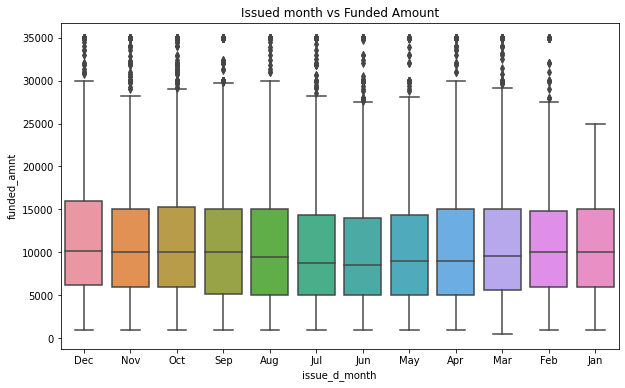

In [457]:
plt.figure(figsize=(10,6))
sns.boxplot(x=loan.issue_d_month, y=loan.funded_amnt, data=loan)
plt.title('Issued month vs Funded Amount')
plt.show()

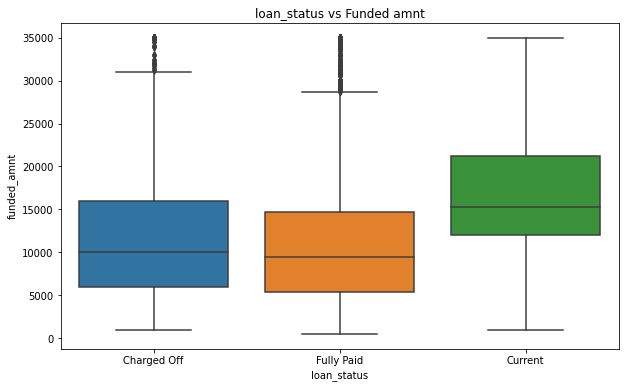

In [458]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y=loan.funded_amnt, data=loan)
plt.title('loan_status vs Funded amnt')
plt.show()

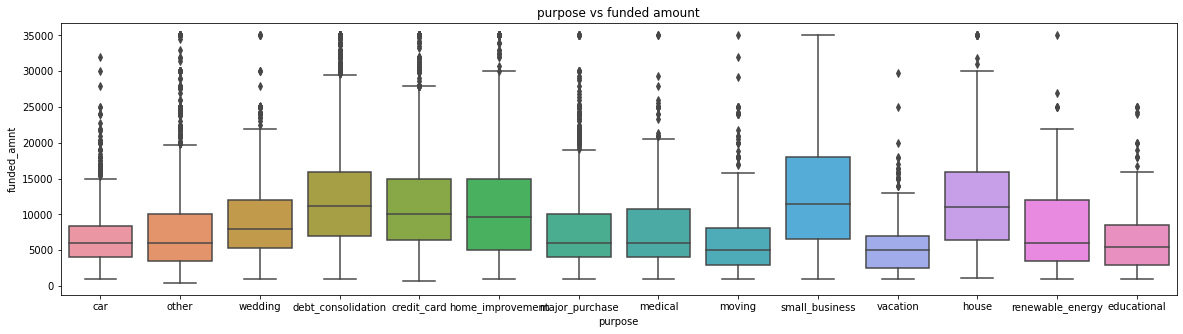

In [459]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.funded_amnt, data=loan)
plt.title('purpose vs funded amount')
plt.show()

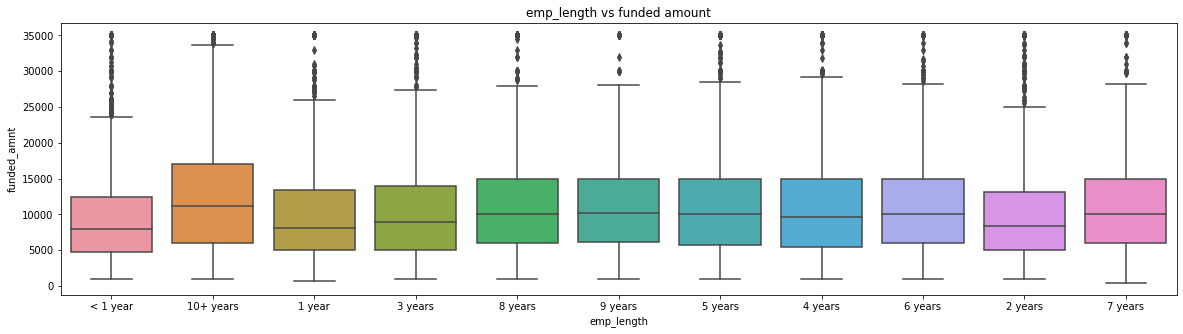

In [460]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.funded_amnt, data=loan)
plt.title('emp_length vs funded amount')
plt.show()

**Observations**:<br>
The Funded Amount has similar observations as Loan Amount.

### int_rate

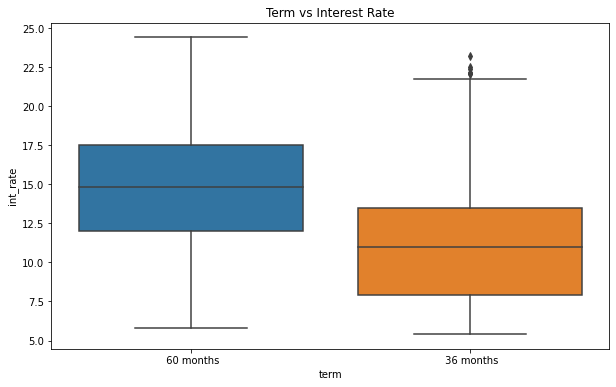

In [461]:
plt.figure(figsize=(10,6))
sns.boxplot(x='term', y=loan.int_rate, data=loan)
plt.title('Term vs Interest Rate')
plt.show()

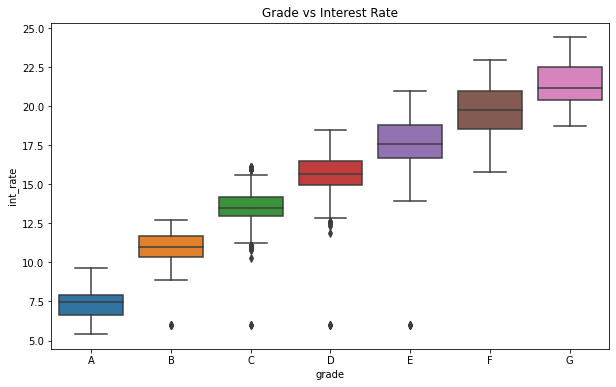

In [462]:
plt.figure(figsize=(10,6))
plt.title('Grade vs Interest Rate')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.int_rate, order = grade_ord, data=loan)
plt.show()

**Observation**:  
The interest rates are higher for Higher tenure loans.  
And Also Interest Rates are Higher as Grades are Lowering (A to G).

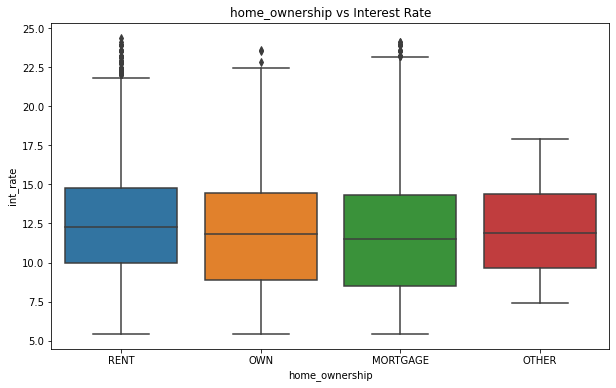

In [463]:
plt.figure(figsize=(10,6))
sns.boxplot(x='home_ownership', y=loan.int_rate, data=loan)
plt.title('home_ownership vs Interest Rate')
plt.show()

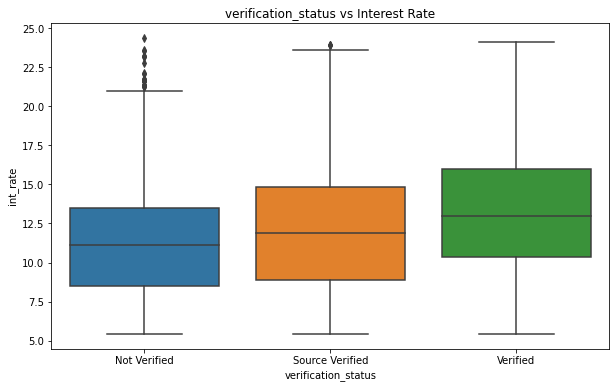

In [464]:
plt.figure(figsize=(10,6))
plt.title('verification_status vs Interest Rate')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.int_rate, order = verification_status_ord, data=loan)
plt.show()

**Observations**:  
* Barrowers with Own and Mortgage got loans with less interest rates as the security will be there.  
* And The Non Verified Barrowers got less interest rates compared to Verified and Source Verified barrowers.

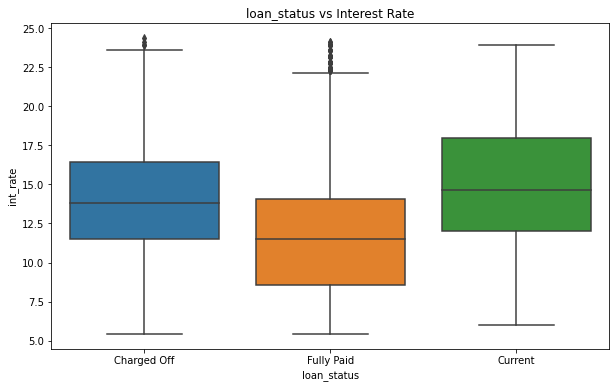

In [465]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y=loan.int_rate, data=loan)
plt.title('loan_status vs Interest Rate')
plt.show()

**Observations**:  
This clearly tells us, grater the interest rate more the chance of Defaulting the loan.

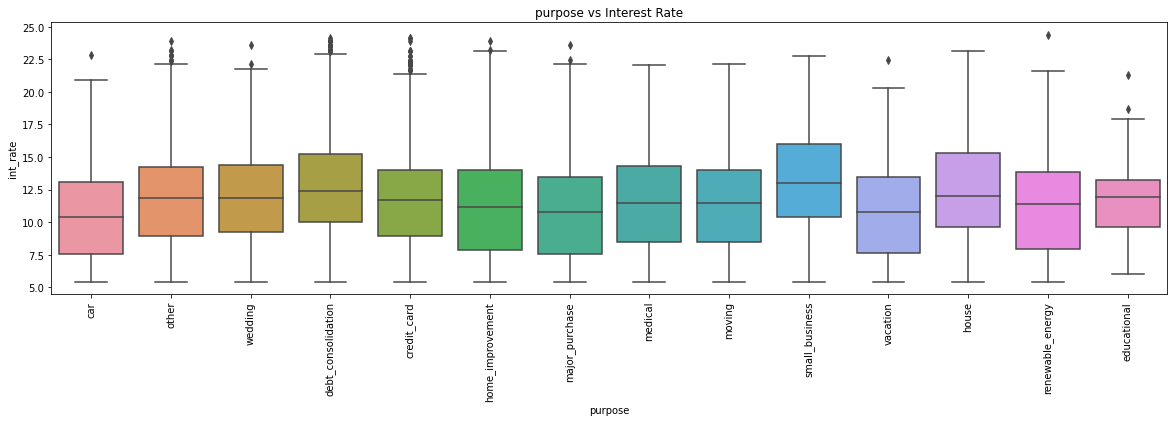

In [466]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.int_rate, data=loan)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')
plt.show()

**Observations**:  
Small Business, Debt Consolidation and House loans are given with more interest rates comparativesly others.

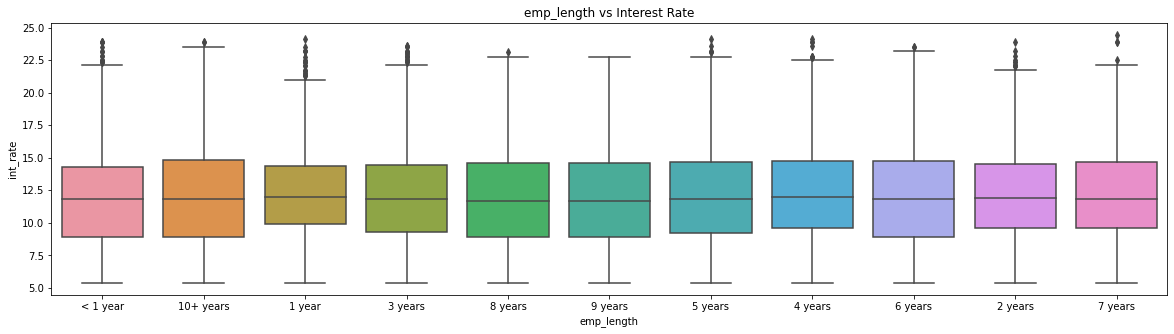

In [467]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.int_rate, data=loan)
plt.title('emp_length vs Interest Rate')
plt.show()

**Observations**:  
Looks like there is no much relation between Employment length and interest rate.

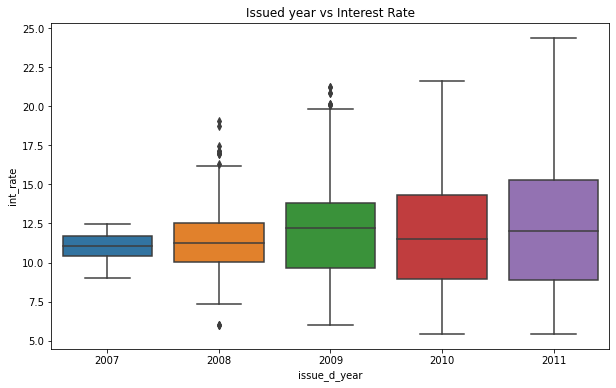

In [468]:
#Issue_d
plt.figure(figsize=(10,6))
sns.boxplot(x=loan.issue_d_year, y=loan.int_rate, data=loan)
plt.title('Issued year vs Interest Rate')
plt.show()

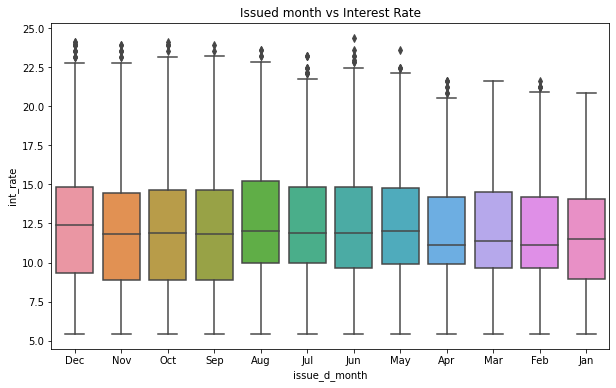

In [469]:
plt.figure(figsize=(10,6))
sns.boxplot(x=loan.issue_d_month, y=loan.int_rate, data=loan)
plt.title('Issued month vs Interest Rate')
plt.show()

**Observations**:  
As the years of business increase the interest rates are getting more diversed but median of of interest rate is quite same in all the years.  


# annual_inc

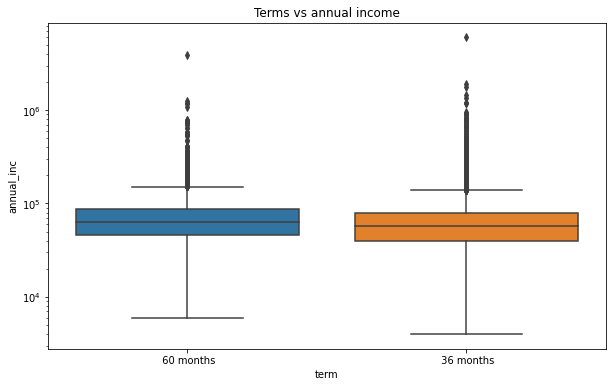

In [470]:
plt.figure(figsize=(10,6))
sns.boxplot(x='term', y=loan.annual_inc, data=loan)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.show()

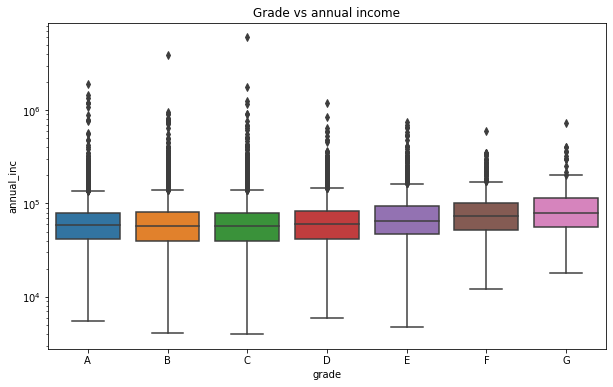

In [471]:
plt.figure(figsize=(10,6))
plt.title('Grade vs annual income')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.annual_inc, order = grade_ord, data=loan)
plt.yscale('log')
plt.show()

**Observations:**  
Comparatively Annual income is higher for lower grades.

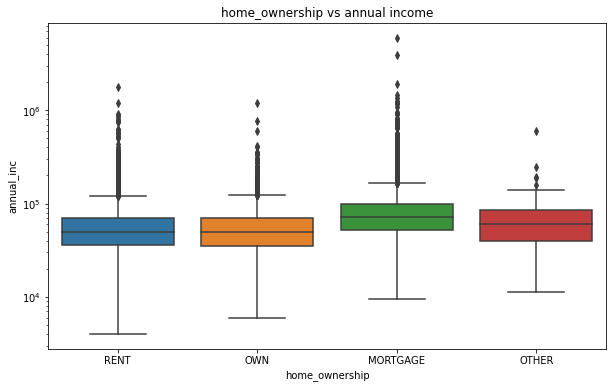

In [472]:
plt.figure(figsize=(10,6))
sns.boxplot(x='home_ownership', y=loan.annual_inc, data=loan)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.show()

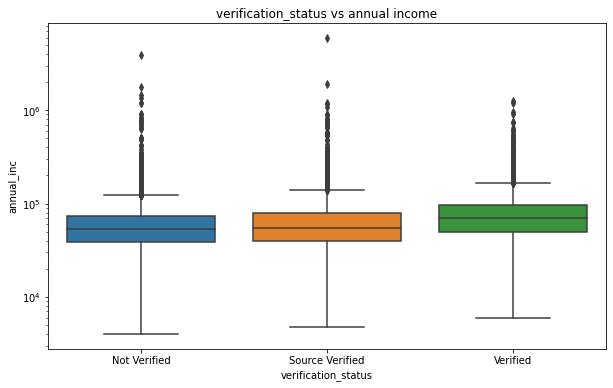

In [473]:
plt.figure(figsize=(10,6))
plt.title('verification_status vs annual income')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.annual_inc, order = verification_status_ord, data=loan)
plt.yscale('log')
plt.show()

**Observations:**  
The home ownership status for MORTAGE has higher income.  
The income source was verfied for most of the borrower's who had higher annual incomes.

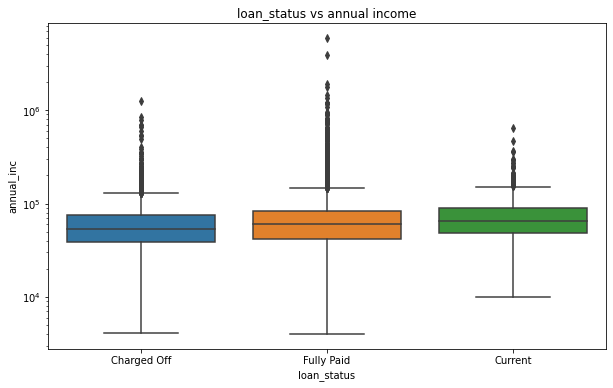

In [474]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y=loan.annual_inc, data=loan)
plt.title('loan_status vs annual income')
plt.yscale('log')
plt.show()

**Observations:**    
Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.  

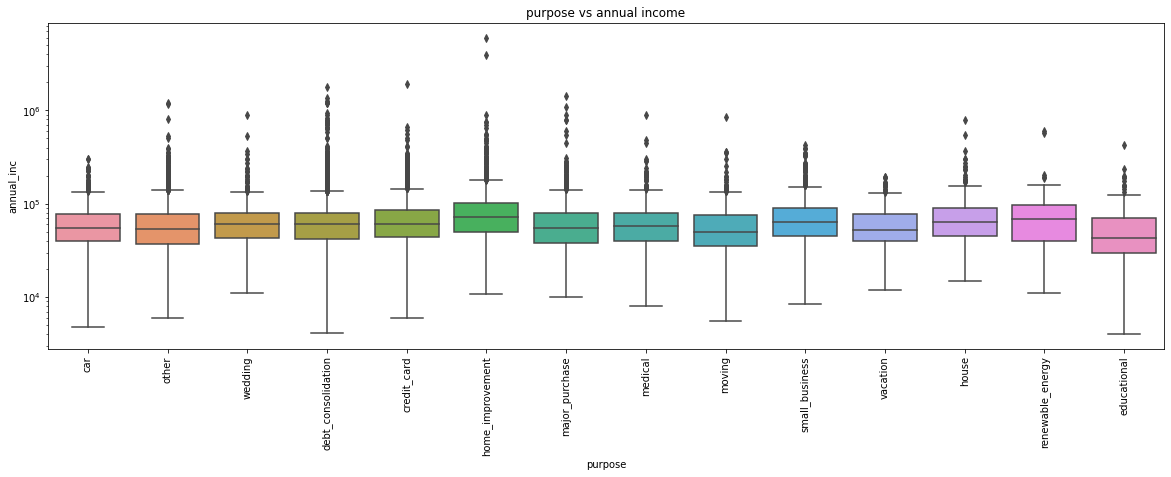

In [475]:
plt.figure(figsize=(20,6))
sns.boxplot(x='purpose', y=loan.annual_inc, data=loan)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')
plt.show()

**Observations:**  
A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request. 

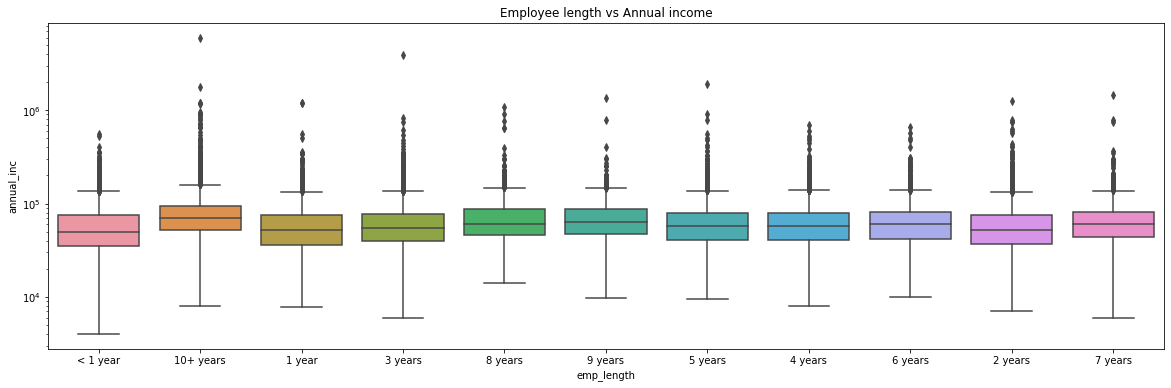

In [476]:
plt.figure(figsize=(20,6))
sns.boxplot(x='emp_length', y=loan.annual_inc, data=loan)
plt.title('Employee length vs Annual income')
plt.yscale('log')
plt.show()

**Observations:**  
The borrower's who has higer income have taken loans for 10+ years of duration.

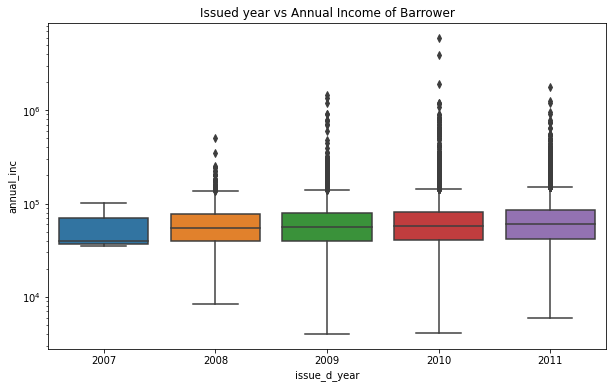

In [477]:
#Issue_d
plt.figure(figsize=(10,6))
sns.boxplot(x=loan.issue_d_year, y=loan.annual_inc, data=loan)
plt.title('Issued year vs Annual Income of Barrower')
plt.yscale('log')
plt.show()

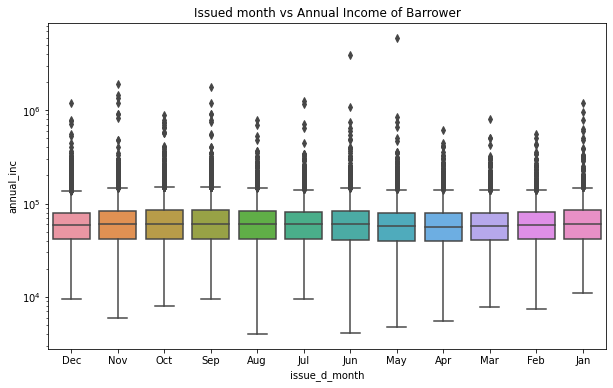

In [478]:
plt.figure(figsize=(10,6))
sns.boxplot(x=loan.issue_d_month, y=loan.annual_inc, data=loan)
plt.title('Issued month vs Annual Income of Barrower')
plt.yscale('log')
plt.show()

**Observations:**  
Annual income has no impact with the month when the loan was funded

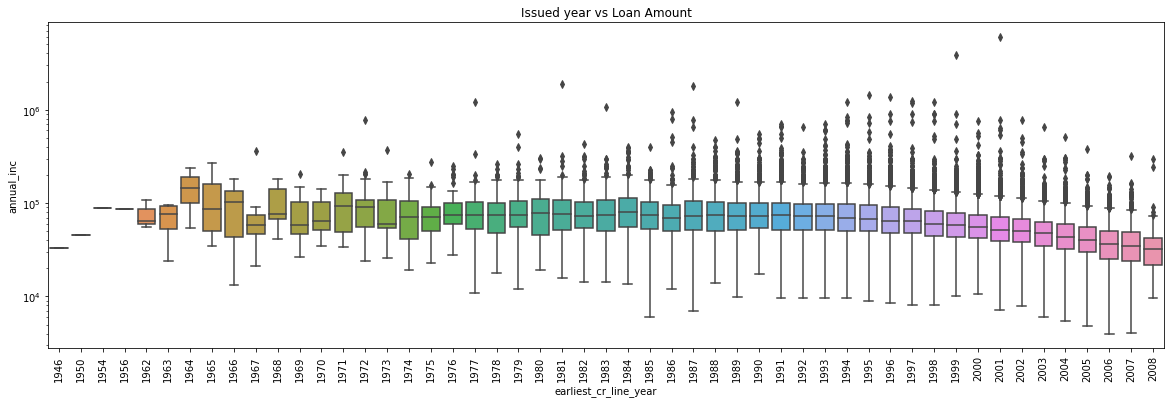

In [479]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.title('Issued year vs Loan Amount')
sns.boxplot(x=loan.earliest_cr_line_year, y=loan.annual_inc, data=loan)
plt.xticks(rotation=90)
#for better analysis plotting on log scale of y values
plt.yscale('log')
plt.show()

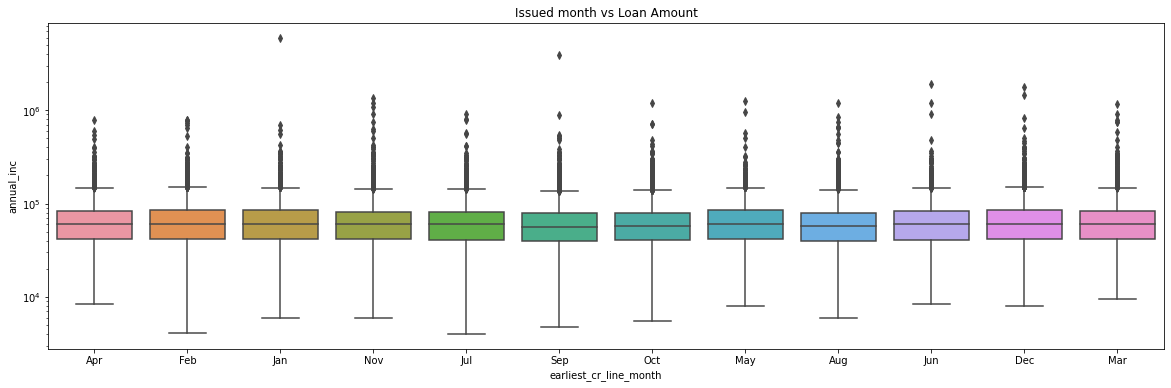

In [480]:
plt.figure(figsize=(20,6))
sns.boxplot(x=loan.earliest_cr_line_month, y=loan.annual_inc, data=loan)
plt.title('Issued month vs Loan Amount')
plt.yscale('log')
plt.show()

**Observations:**   
There is not specific pattern in the annual income and earliest Credit line year and month.

# DTI
Debt to Income Ratio

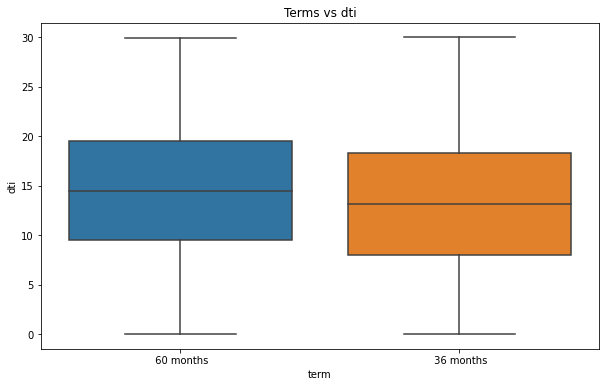

In [481]:
plt.figure(figsize=(10,6))
sns.boxplot(x='term', y=loan.dti, data=loan)
plt.title('Terms vs dti')
plt.show()

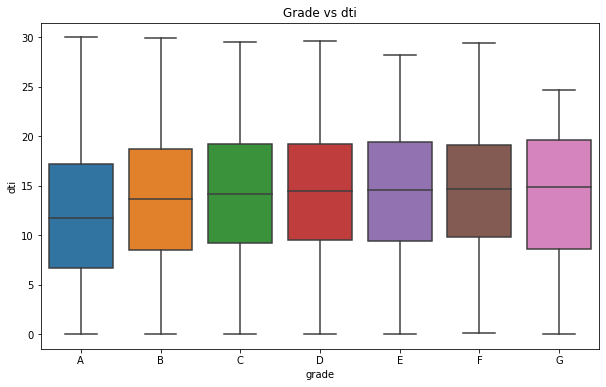

In [482]:
plt.figure(figsize=(10,6))
plt.title('Grade vs dti')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.dti, order = grade_ord, data=loan)
plt.show()

**Observation**:   
DTI is bit high for people who got more tenure i.e., 60 months.  
A Grade barrowers are having low DTI than Other grades. DTI should be low for having high repayment percentage.

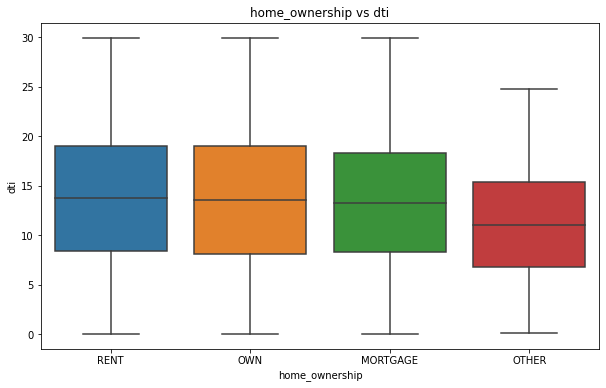

In [483]:
plt.figure(figsize=(10,6))
sns.boxplot(x='home_ownership', y=loan.dti, data=loan)
plt.title('home_ownership vs dti')
plt.show()

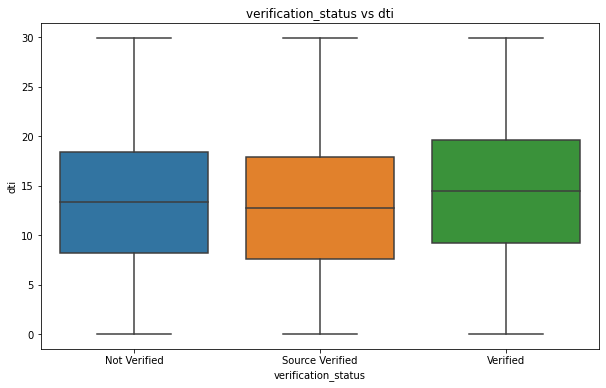

In [484]:
plt.figure(figsize=(10,6))
plt.title('verification_status vs dti')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.dti, order = verification_status_ord, data=loan)
plt.show()

**Observations**:  
People in Other home ownership has less DTI than others. This is may be bacause other people have mortgage and home loans.

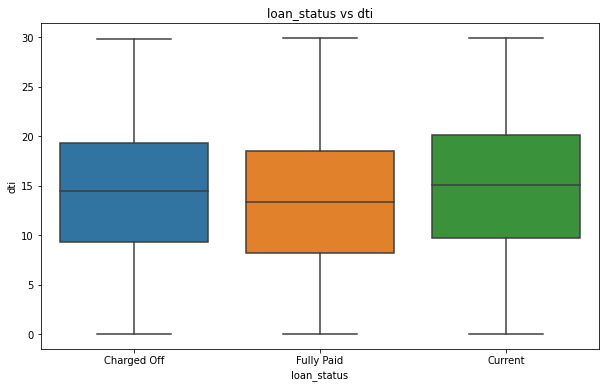

In [485]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y=loan.dti, data=loan)
plt.title('loan_status vs dti')
plt.show()

**Observations**  
Borrowers with high DTI has bit more probability to default

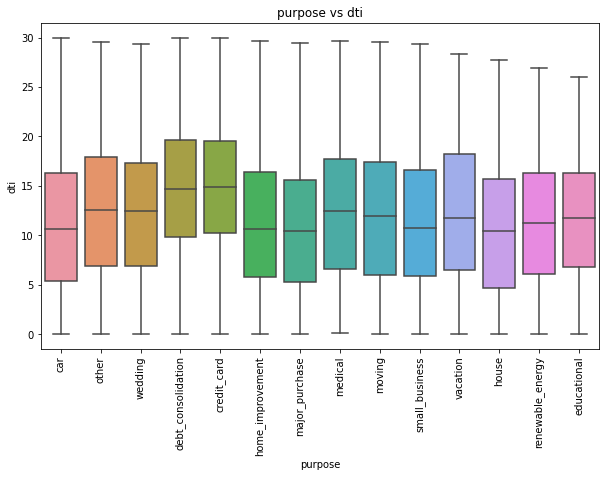

In [486]:
plt.figure(figsize=(10,6))
sns.boxplot(x='purpose', y=loan.dti, data=loan)
plt.xticks(rotation=90)
plt.title('purpose vs dti')
plt.show()

**Observations**:  
People who took loan for _credit card_ and _debt consolidation_ purpose has more DTI than other purposes.

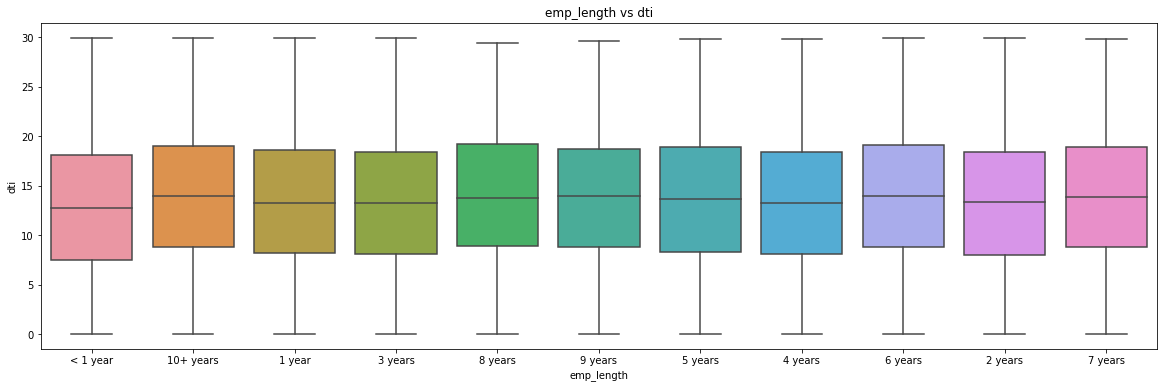

In [487]:
plt.figure(figsize=(20,6))
sns.boxplot(x='emp_length', y=loan.dti, data=loan)
plt.title('emp_length vs dti')
plt.show()

**Observations**:   
The dti is pretti much similar for barrowers with all the employment length.

# pub_rec
Number of derogatory public records

In [488]:
#Finding proportation of values in each value of category
df = loan.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

pub_rec        term     id  proportion
0        0   36 months  25086    0.725113
1        0   60 months   9510    0.274887
2        1   36 months   1292    0.701793
3        1   60 months    549    0.298207
4        2   36 months     35    0.744681
5        2   60 months     12    0.255319
6        3   36 months      7    1.000000
7        4   36 months      2    1.000000

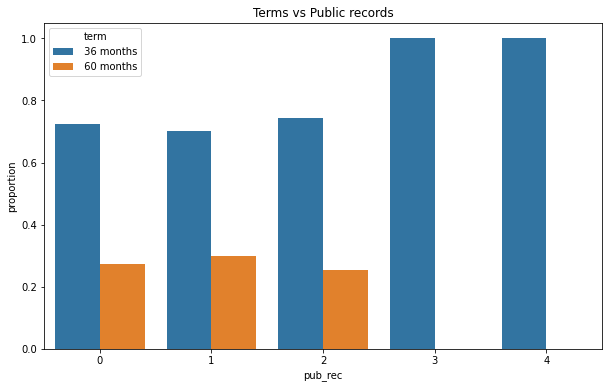

In [489]:
plt.figure(figsize=(10,6))
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)
plt.title('Terms vs Public records')
plt.show()

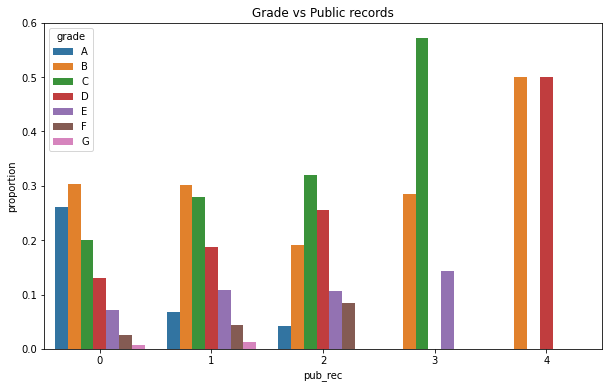

In [490]:
plt.figure(figsize=(10,6))
df = loan.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.title('Grade vs Public records')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)
plt.show()

**Observations**:  
* Borrwers higher public derogatory records took loan for 36 months tenure. where as 80% and 20% distribution between 36 and 60months tenure for lower public derogatory records borrowers.  
* We can see the grades are really showing some pattern. A grade people are having less derogatory records then other grades.  
* Exceptionally C,D,E graded people are having high pub_recs.

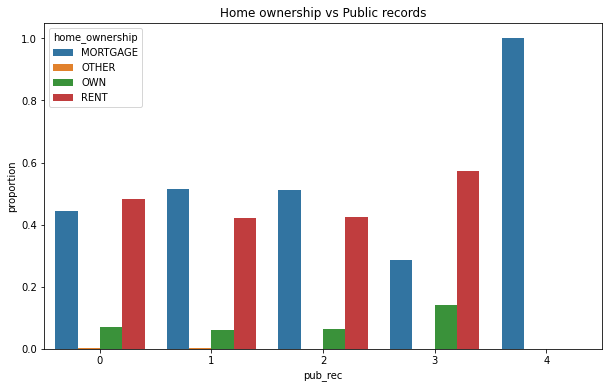

In [491]:
plt.figure(figsize=(10,6))
df = loan.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
plt.title('Home ownership vs Public records')
plt.show()

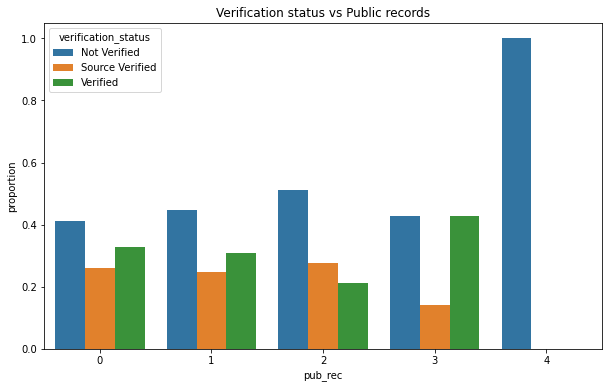

In [492]:
plt.figure(figsize=(10,6))
df = loan.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)
plt.title('Verification status vs Public records')
plt.show()

**Observations**:  
Borrowers with 4 public Derogatory records are high in mortgage owned house category and also Not verified Catogry of verification status.

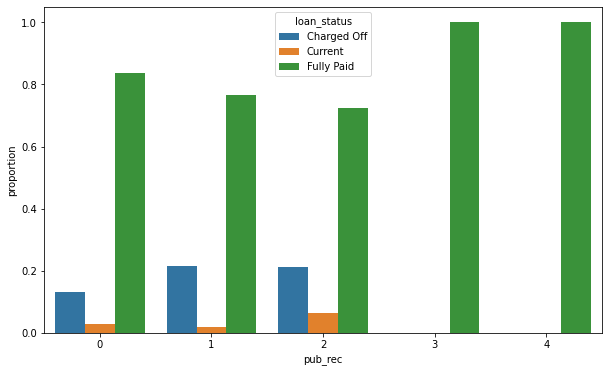

In [493]:
#Proportion of values for each category
df = loan.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.figure(figsize=(10,6))
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)
plt.show()

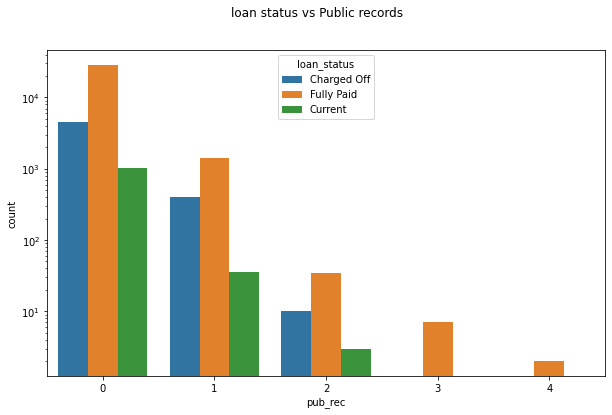

In [494]:
plt.figure(figsize=(10,6))
sns.countplot(loan.pub_rec, hue='loan_status', data=loan)
plt.yscale('log')
plt.suptitle('loan status vs Public records')
plt.show()

**Observations**:  
The there is increase in deafulted loans for people with derogatory records from 0 to 2 but it is not there for pub_rec 3 adn 4, this is because there very few people took loans in those pub_rec numbers where are as from most borrowers are in 0 pub_rec category.

# pub_rec_bankruptcies
Number of public record bankruptcies

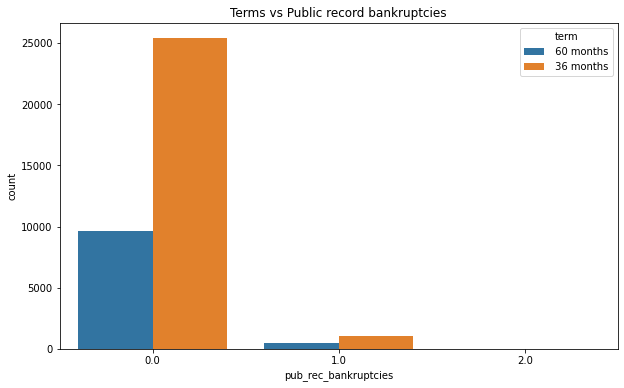

In [495]:
plt.figure(figsize=(10,6))
sns.countplot(loan.pub_rec_bankruptcies, hue='term', data=loan)
plt.title('Terms vs Public record bankruptcies')
plt.show()

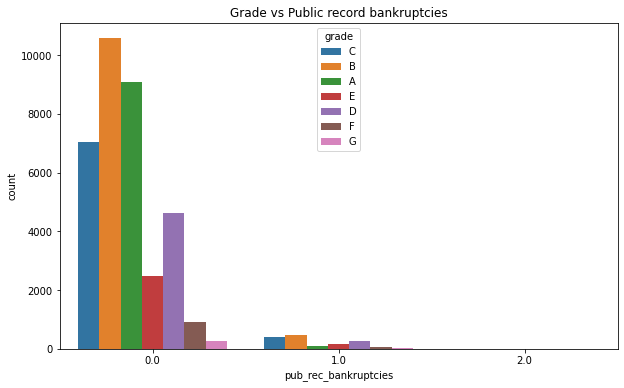

In [496]:
plt.figure(figsize=(10,6))
plt.title('Grade vs Public record bankruptcies')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.countplot(loan.pub_rec_bankruptcies, hue='grade', data=loan)
plt.show()

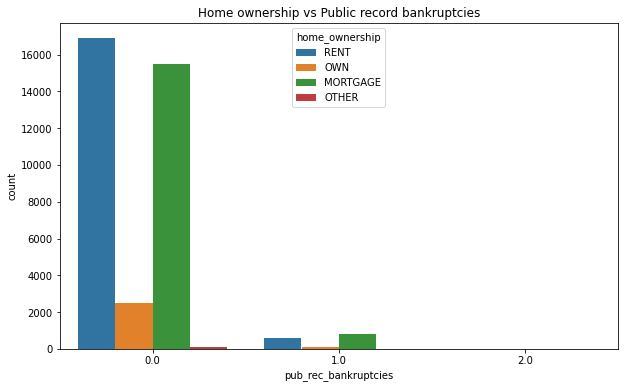

In [497]:
plt.figure(figsize=(10,6))
sns.countplot(loan.pub_rec_bankruptcies, hue='home_ownership', data=loan)
plt.title('Home ownership vs Public record bankruptcies')
plt.show()

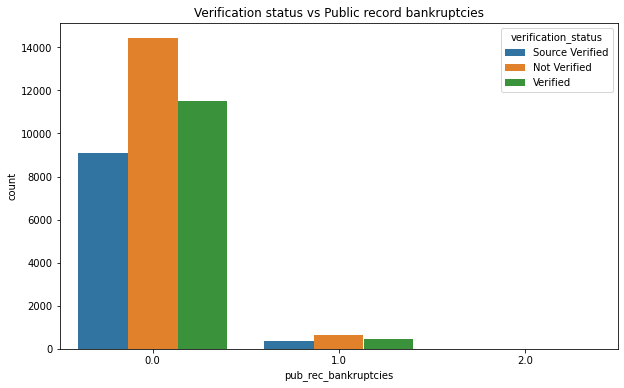

In [498]:
plt.figure(figsize=(10,6))
plt.title('Verification status vs Public record bankruptcies')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.countplot(loan.pub_rec_bankruptcies, hue='verification_status', data=loan)
plt.show()

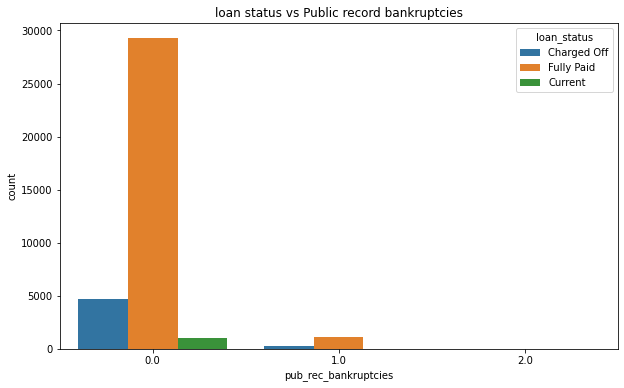

In [499]:
plt.figure(figsize=(10,6))
sns.countplot(loan.pub_rec_bankruptcies, hue='loan_status', data=loan)
plt.title('loan status vs Public record bankruptcies')
plt.show()

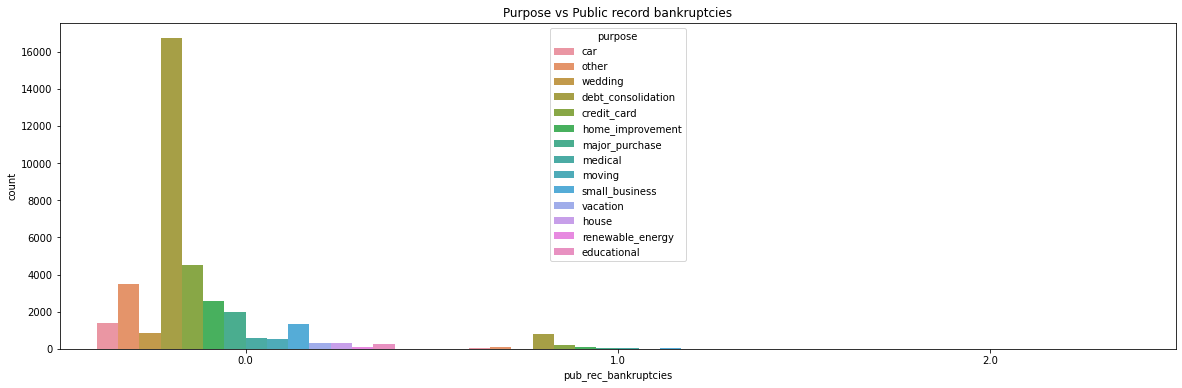

In [500]:
plt.figure(figsize=(20,6))
sns.countplot(loan.pub_rec_bankruptcies, hue='purpose', data=loan)
plt.title('Purpose vs Public record bankruptcies')
plt.show()

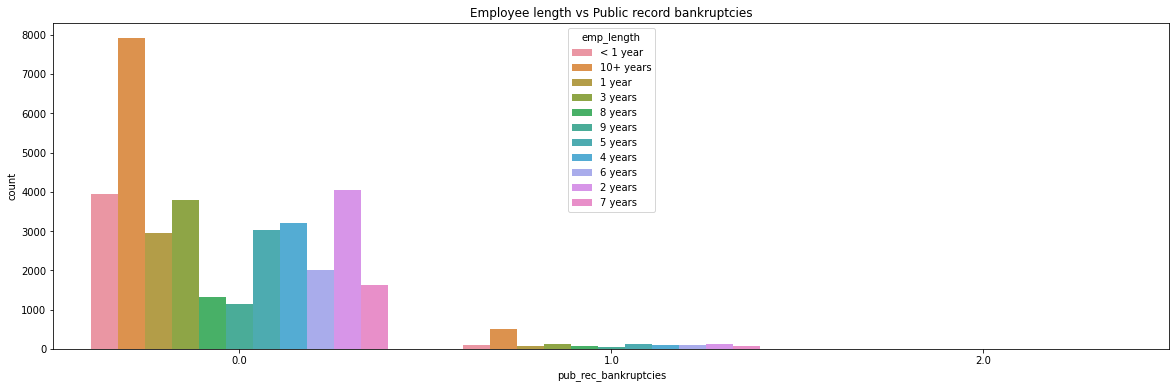

In [501]:
plt.figure(figsize=(20,6))
sns.countplot(loan.pub_rec_bankruptcies, hue='emp_length', data=loan)
plt.title('Employee length vs Public record bankruptcies')
plt.show()

### inq_last_6mths

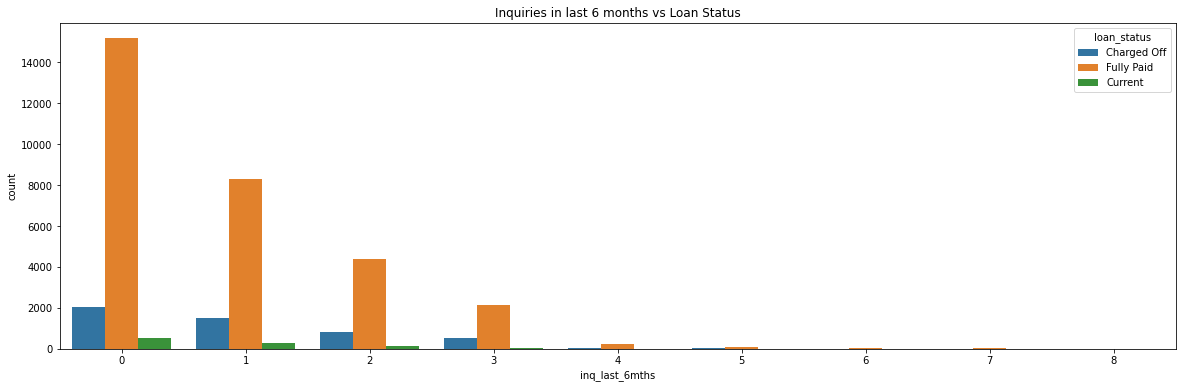

In [502]:
plt.figure(figsize=(20,6))
sns.countplot(loan.inq_last_6mths, hue='loan_status', data=loan)
plt.title('Inquiries in last 6 months vs Loan Status')
plt.show()

### Approval Loan Amount Ratio

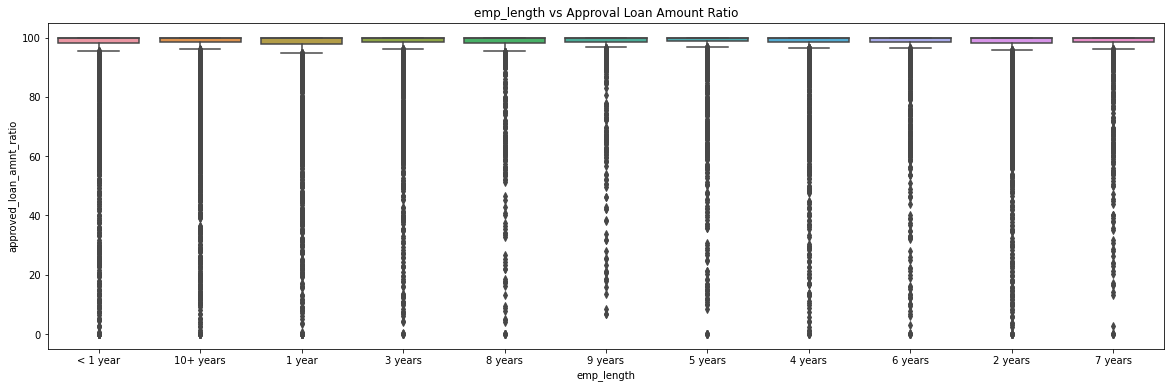

In [503]:
plt.figure(figsize=(20,6))
sns.boxplot(x='emp_length', y=loan.approved_loan_amnt_ratio, data=loan)
plt.title('emp_length vs Approval Loan Amount Ratio')
plt.show()

**Observations**:  
There is not much relation between approval of loan amount ratio  and employment length

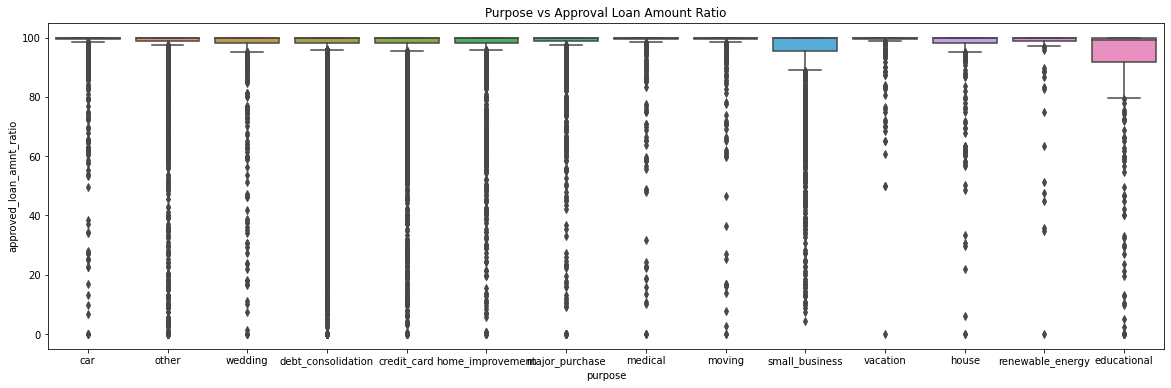

In [504]:
plt.figure(figsize=(20,6))
sns.boxplot(x='purpose', y=loan.approved_loan_amnt_ratio, data=loan)
plt.title('Purpose vs Approval Loan Amount Ratio')
plt.show()

**Observations**:  
The Funded amount by investors is lower than requested loan amount in education and small business purposes.

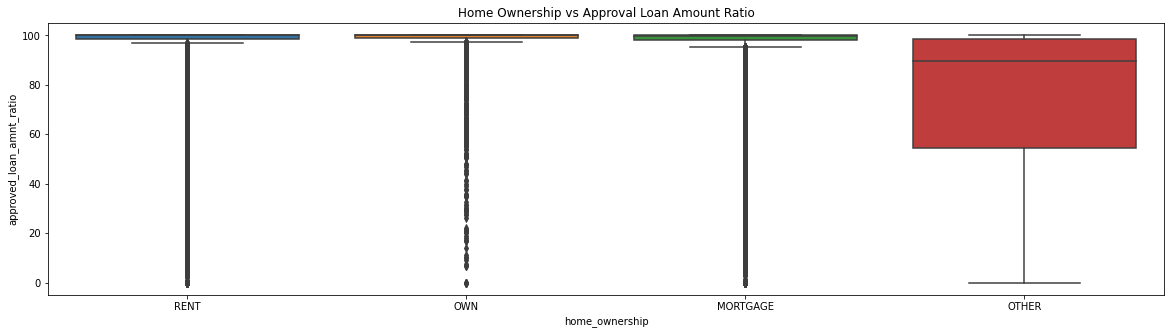

In [505]:
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y=loan.approved_loan_amnt_ratio, data=loan)
plt.title('Home Ownership vs Approval Loan Amount Ratio')
plt.show()

**Observations**:  
Borrowers with Other home ownership are having less approved ratio which mean they got less amount than request amount.

## Bivariate Analysis

### Term vs Loan Status

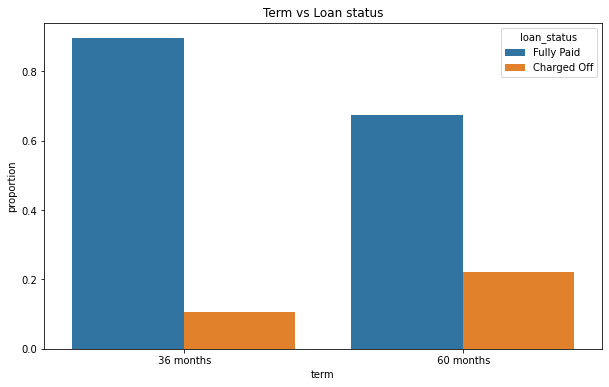

In [506]:
#Proportion of values for each category
plt.figure(figsize=(10,6))
df = loan.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')
plt.show()

**Observations**:  
Looks like there  are more proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.

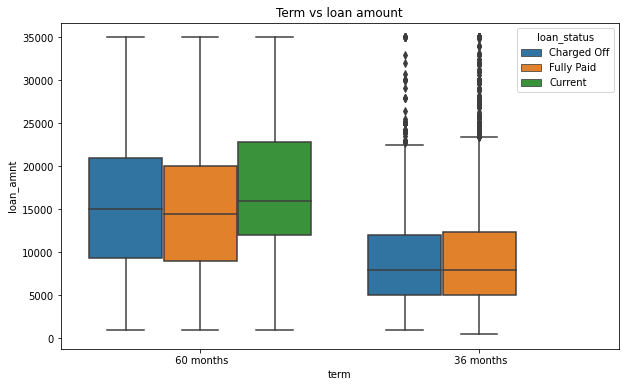

In [507]:
plt.figure(figsize=(10,6))
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan)
plt.title('Term vs loan amount')
plt.show()

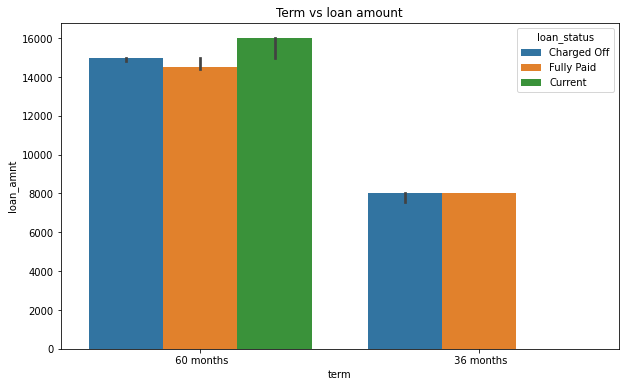

In [508]:
plt.figure(figsize=(10,6))
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

**Observations**:  
Loan amount is not a decider for defaults in both 36 adn 60 months.   
Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.

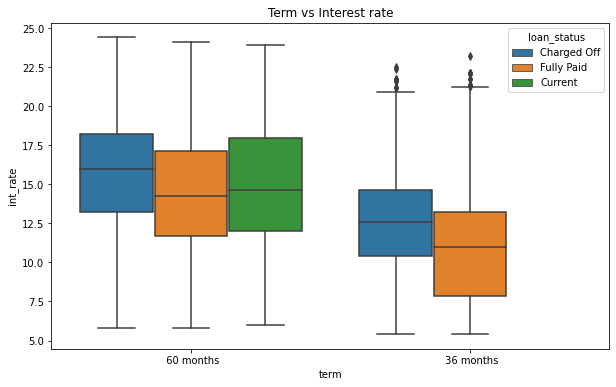

In [509]:
plt.figure(figsize=(10,6))
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan)
plt.title('Term vs Interest rate')
plt.show()

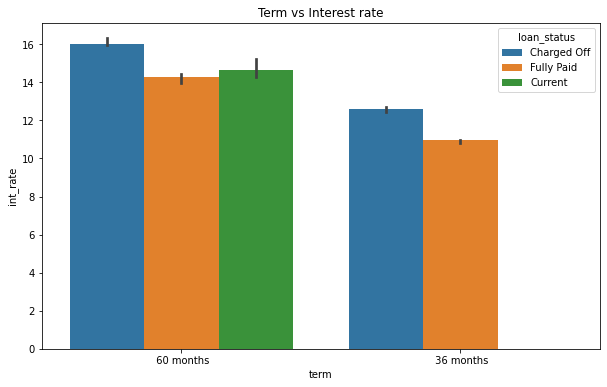

In [510]:
plt.figure(figsize=(10,6))
sns.barplot(x='term', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

**Observations**  
For higher interest rates the deafult rate is higher in both 36 and 60 months tenure.

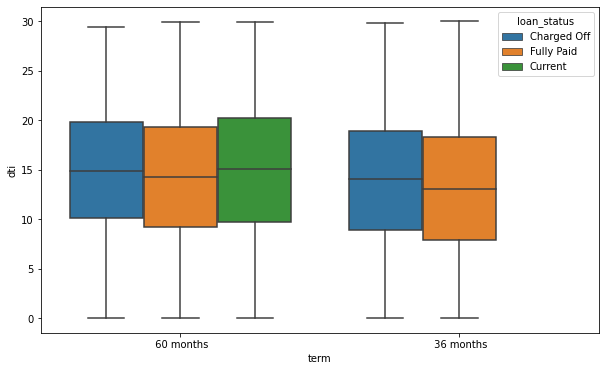

In [511]:
plt.figure(figsize=(10,6))
sns.boxplot(x='term', y='dti', hue='loan_status', data=loan)
plt.show()

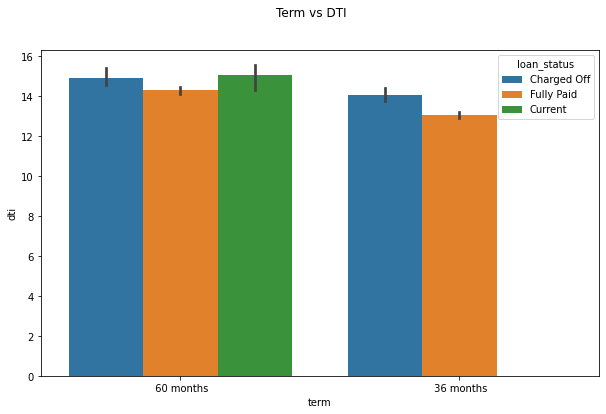

In [512]:
plt.figure(figsize=(10,6))
sns.barplot(x='term', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

**Observations:**  
Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio.

### Grade

In [513]:
#Sorting Grades from A to G
grade_ord = loan.grade.unique()
grade_ord.sort()

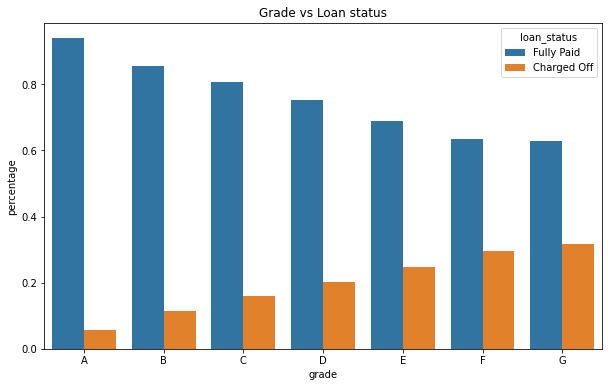

In [514]:
df = loan.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')
plt.show()

**Observations:**  
The above graph clearly says the Charged off increases as grades decreases.

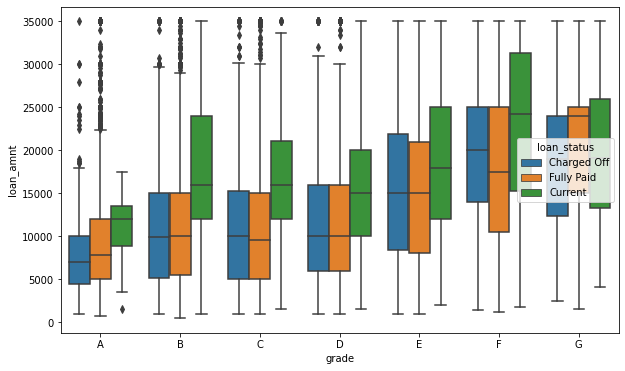

In [515]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=loan, order = grade_ord)
plt.show()

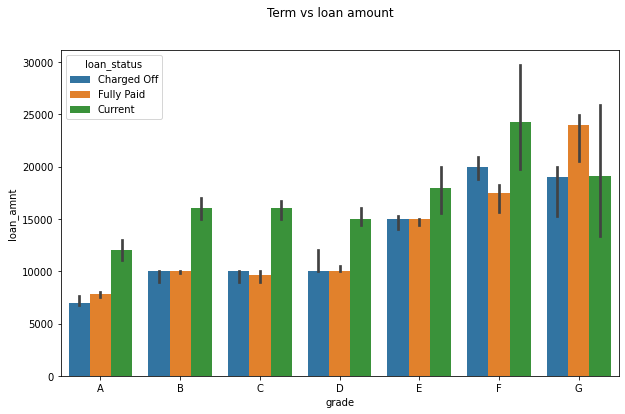

In [516]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

**Observations:**  
* For lower grades 'F' and 'G' there are more difference between charged-off and fully paid.  
* The lower grade people has taken higher amount of loans and also they are more prone to default the loan.

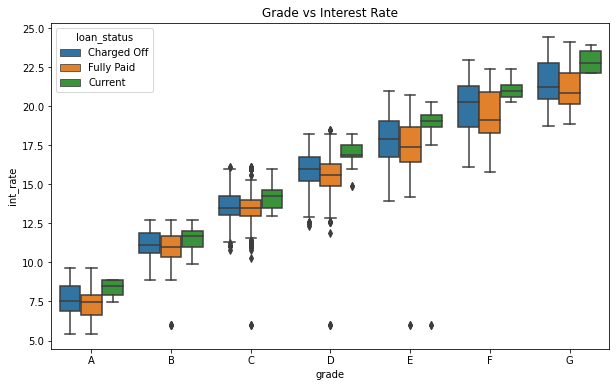

In [517]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.show()

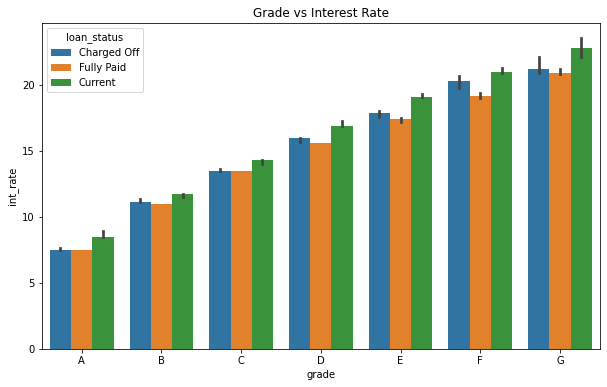

In [518]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

**Observations:**  
As grade decreases the interest rate gradually increases. and they are more and more prone to default the loan.

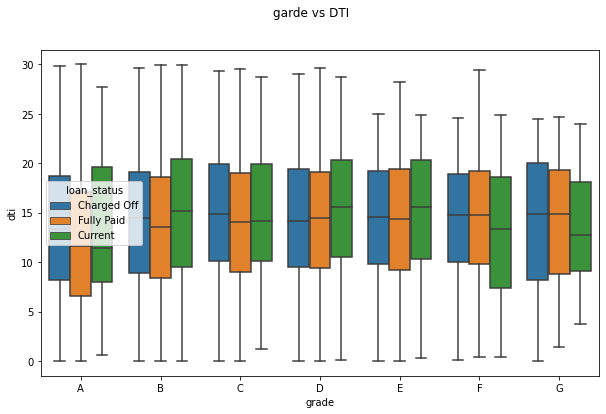

In [519]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='dti', hue='loan_status', data=loan, order=grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

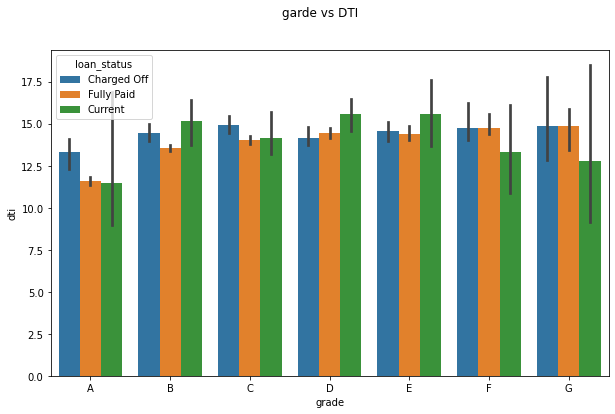

In [520]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='dti', hue='loan_status', data=loan, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

**Observations:**  
There is not much change in dti in each grade and loan status.

### Employment Length

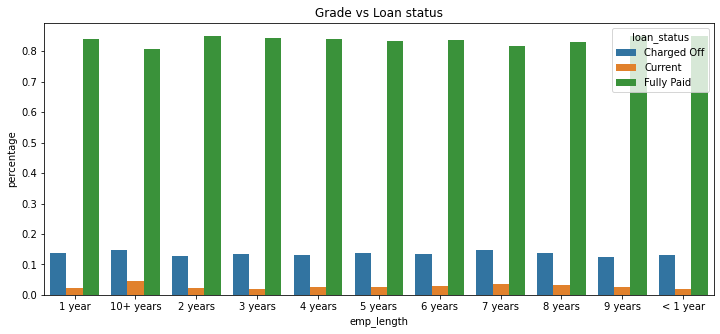

In [521]:
df = loan.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')
plt.show()

**Observations:**
There is not big changes or pattern observed defaulters across employment lengths.

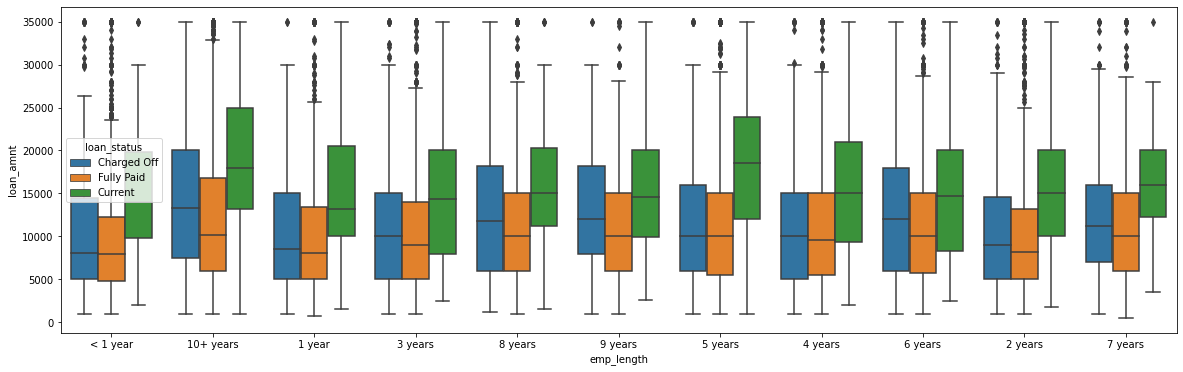

In [522]:
plt.figure(figsize=(20,6))
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan)
plt.show()

**Observations:**  
Borrowers with higher employment lengths and took more loan amounts got more default rate.

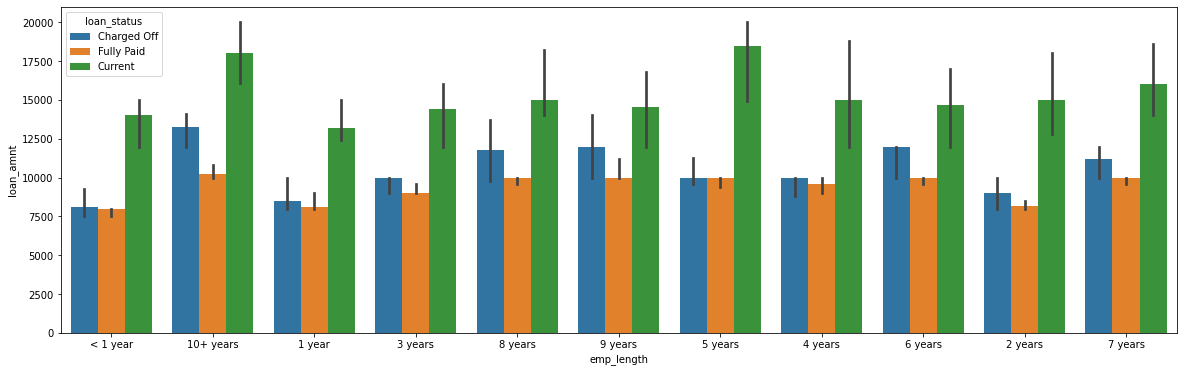

In [523]:
plt.figure(figsize=(20,6))
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.show()

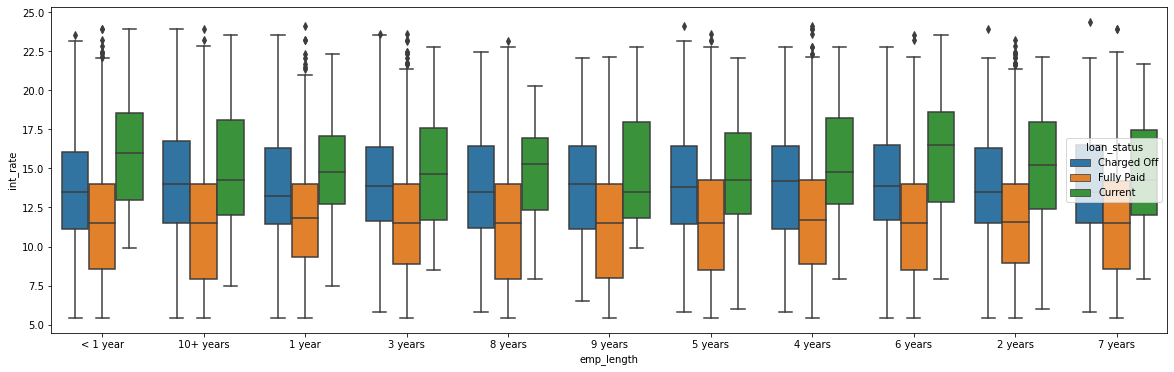

In [524]:
plt.figure(figsize=(20,6))
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=loan)
plt.show()

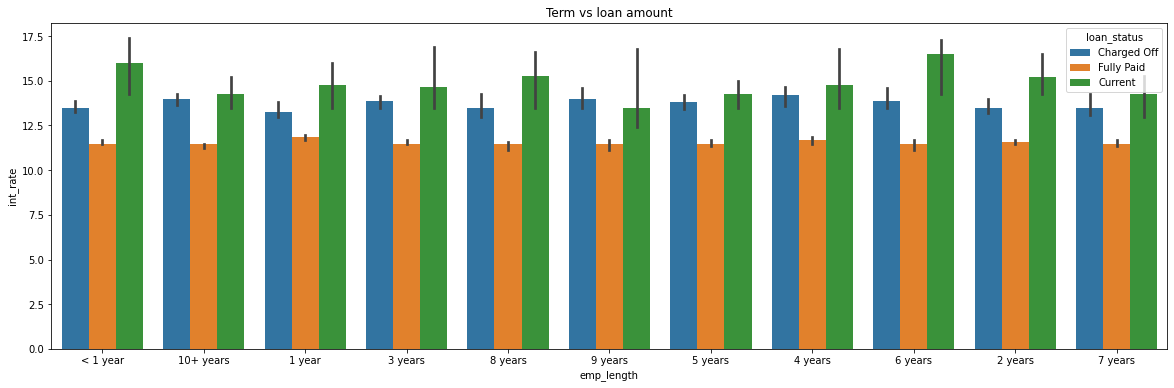

In [525]:
plt.figure(figsize=(20,6))
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

**Observations**:  
Irrespictive of employment length loans with more interest rates got defaulted more.

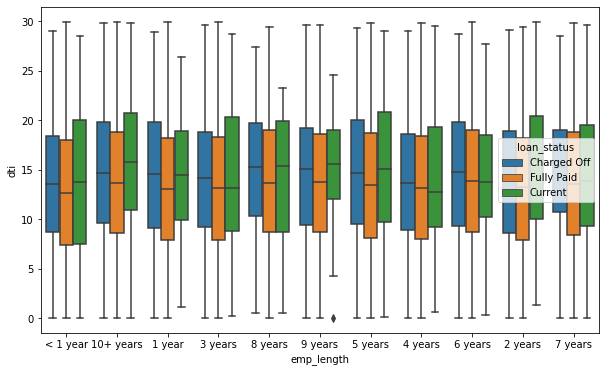

In [526]:
plt.figure(figsize=(10,6))
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=loan)
plt.show()

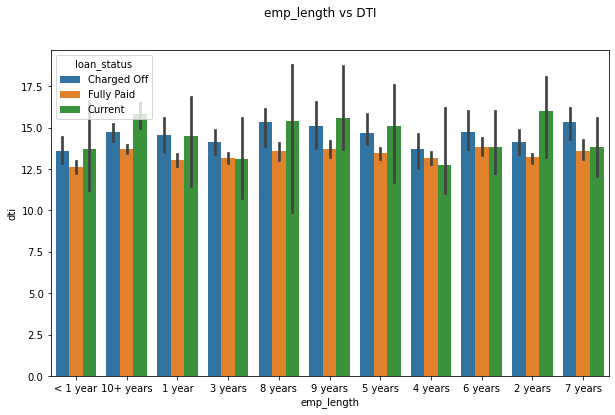

In [527]:
plt.figure(figsize=(10,6))
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('emp_length vs DTI')
plt.show()

**Observations:**  
Employment Length and DTI are not showing any patterns towards defaults.

### Home Ownership

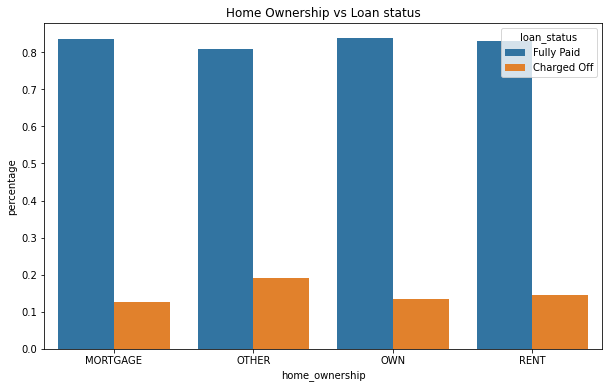

In [528]:
df = loan.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(10,6))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')
plt.show()

**Observations:**   
There is bit high percentage of defaults are recorded in _other_ home ownership category.

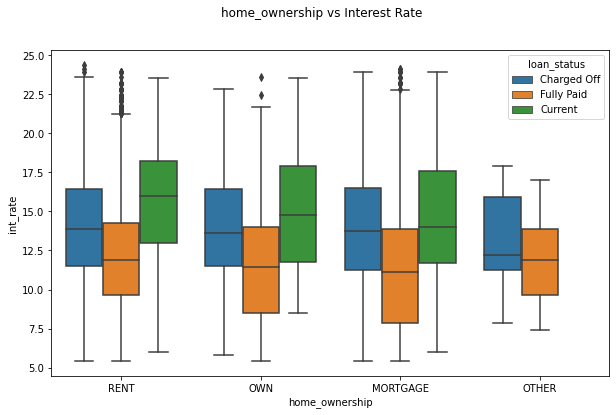

In [529]:
plt.figure(figsize=(10,6))
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

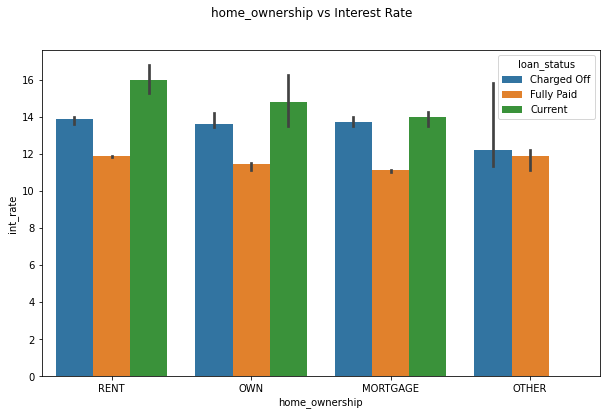

In [530]:
plt.figure(figsize=(10,6))
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

**Observations:**  
Irrespictive of Home owner ship, when the interest rate is high the dafault rate also high.

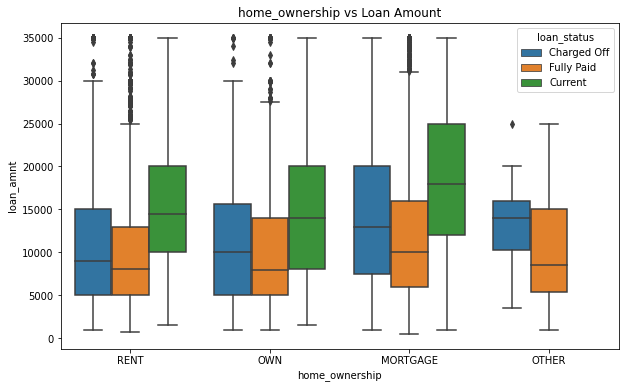

In [531]:
plt.figure(figsize=(10,6))
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan)
plt.title('home_ownership vs Loan Amount')
plt.show()

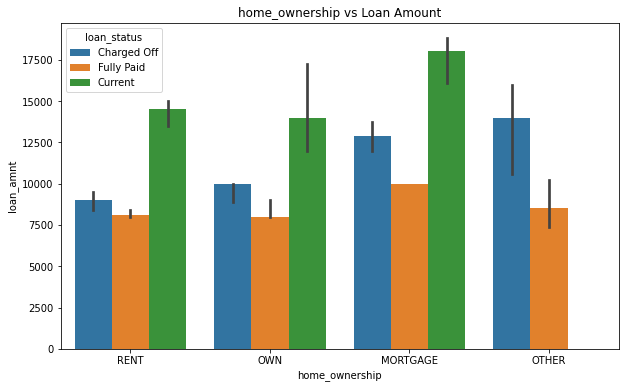

In [532]:
plt.figure(figsize=(10,6))
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.title('home_ownership vs Loan Amount')
plt.show()

**Observations:**  
Borrowers who took higher loan amounts defaulted more than others.

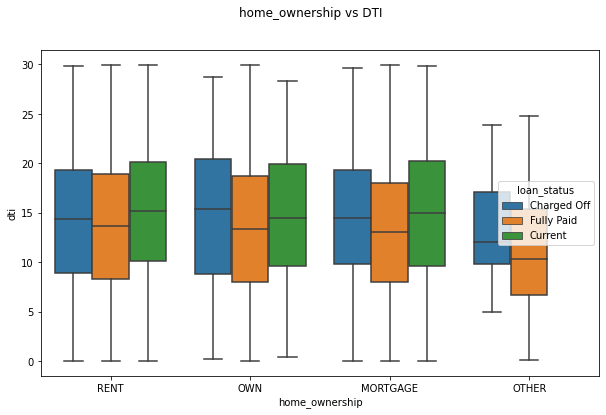

In [533]:
plt.figure(figsize=(10,6))
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=loan)
plt.suptitle('home_ownership vs DTI')
plt.show()

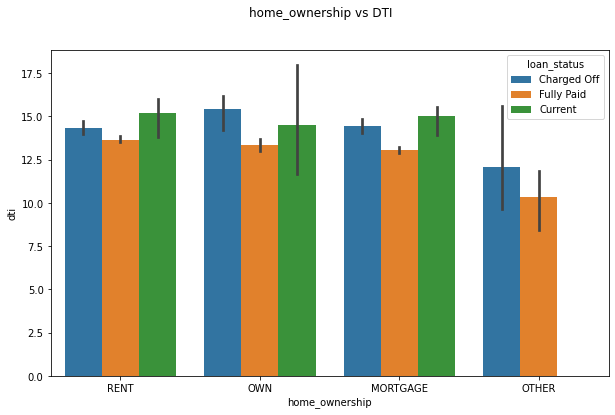

In [534]:
plt.figure(figsize=(10,6))
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

**Observations:**  
* Borrowers in _other_ home ownership category has less dti than other categories.  
* There is equal posibility of home owners defaulting for all the home ownerships.

### Address State

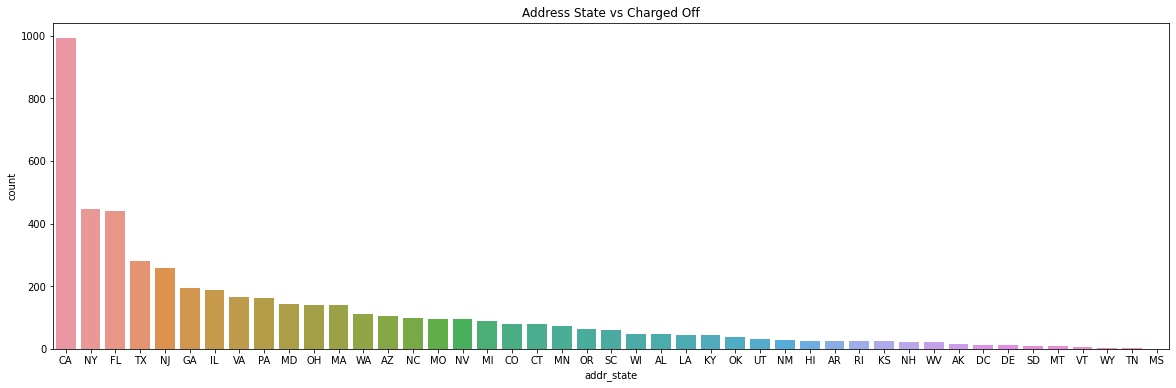

In [535]:
charged_off_df = loan[loan.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')
plt.show()

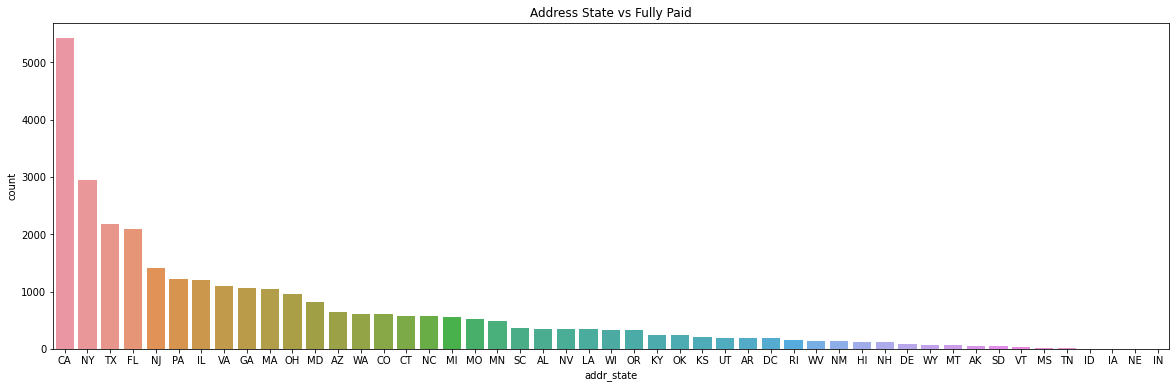

In [536]:
fp_df = loan[loan.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

**Observations**:   
More number of borrowers defaulted in _CA_ , _FL_ and _NY_ states.

### Verfication Status

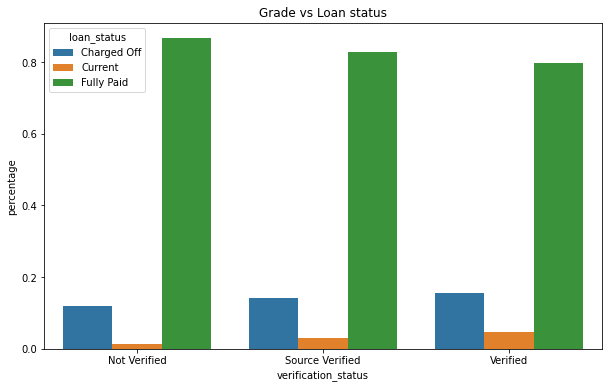

In [537]:
df = loan.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(10,6))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')
plt.show()

**Observations:**  
There isn't big change in charged of loans for all varification status.

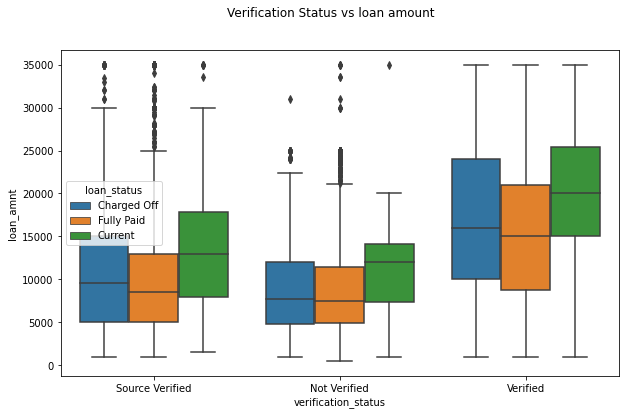

In [538]:
plt.figure(figsize=(10,6))
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan)
plt.suptitle('Verification Status vs loan amount')
plt.show()

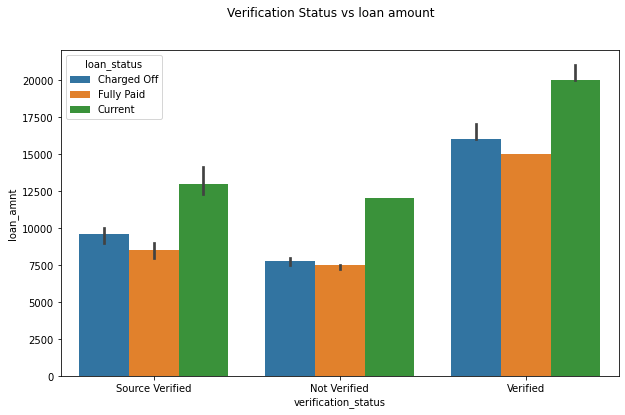

In [539]:
plt.figure(figsize=(10,6))
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

**Observations:**  
* Verified loans are given more loan amounts compared to others.
* There is a slight increase in loan amount for verified and source verified loan when they are defaulted.

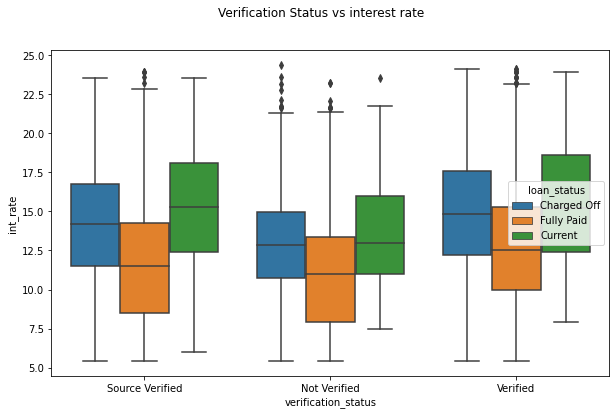

In [540]:
plt.figure(figsize=(10,6))
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=loan)
plt.suptitle('Verification Status vs interest rate')
plt.show()

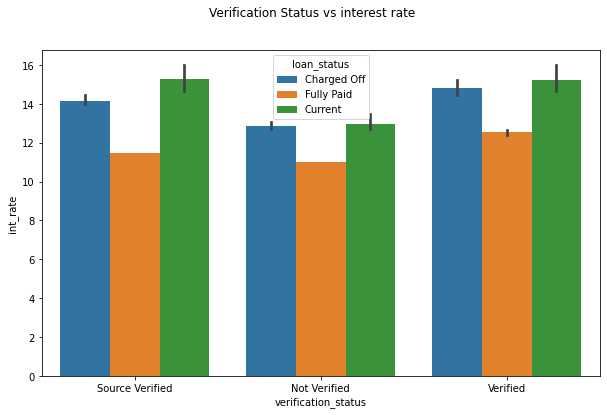

In [541]:
plt.figure(figsize=(10,6))
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

**Observations:**  
Irrespective of verification status higher interest rates are incurring default of loan.

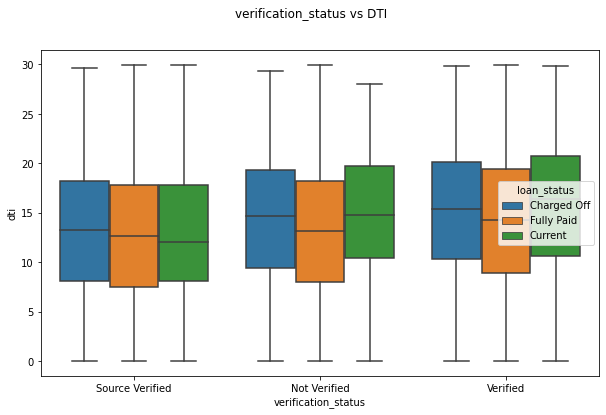

In [542]:
plt.figure(figsize=(10,6))
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=loan)
plt.suptitle('verification_status vs DTI')
plt.show()

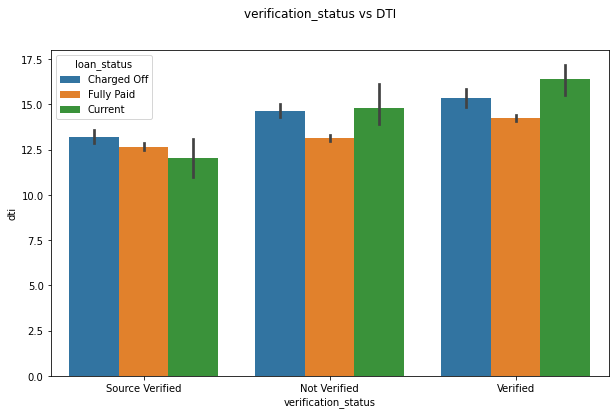

In [543]:
plt.figure(figsize=(10,6))
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

**Observations:**  
There is slight increase in the dti mean for defaulted laons for all the verification status categories.

### Purpose

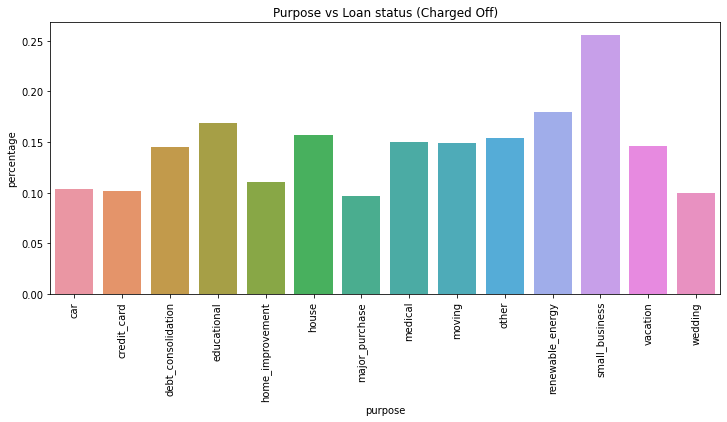

In [544]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')
plt.show()

**Observations:**  
Charged-off are higher for small_business comparitively.

<Figure size 432x288 with 0 Axes>

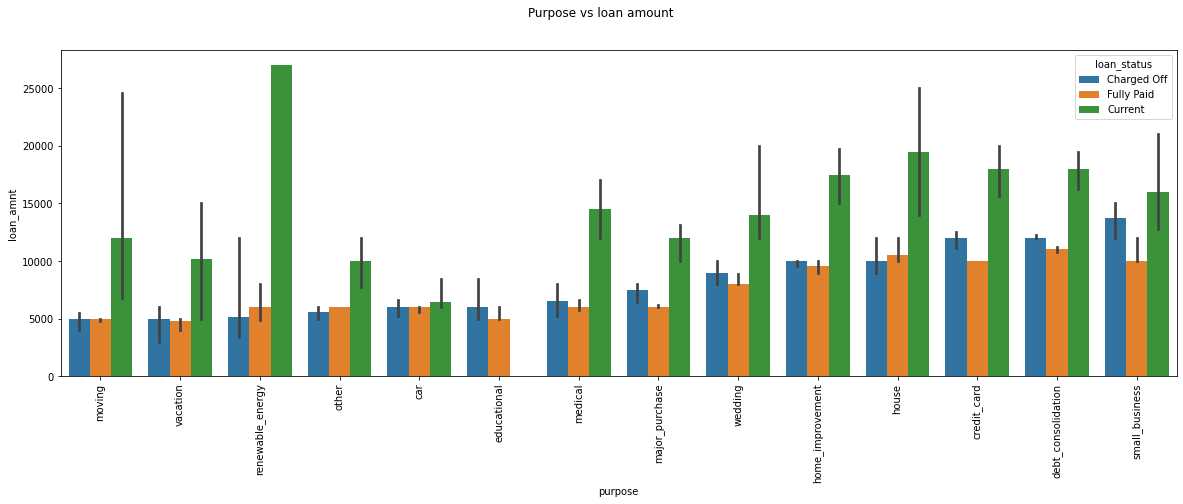

In [545]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()
plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,6))
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)
plt.suptitle('Purpose vs loan amount')
plt.show()

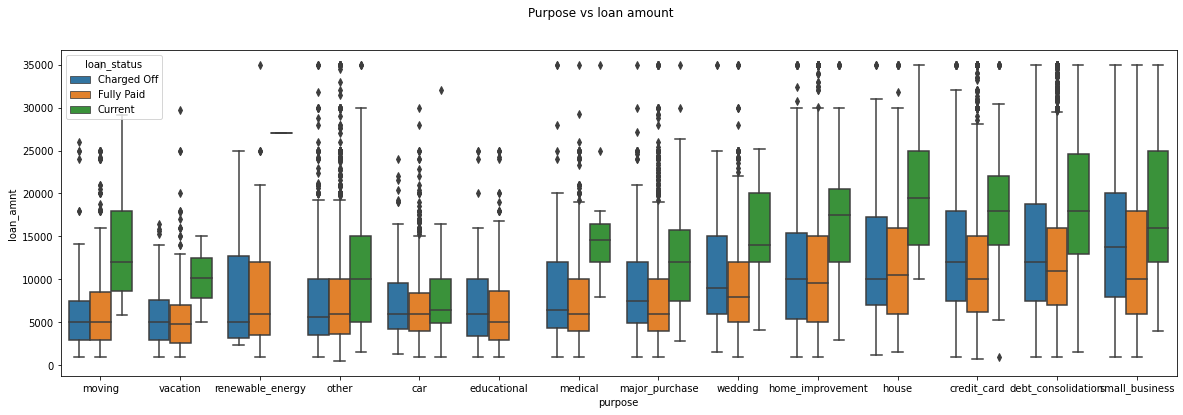

In [546]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()
plt.figure(figsize=(20,6))
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.suptitle('Purpose vs loan amount')
plt.show()

**Observations:**  
Small Business has more defaults when the loan amount is also high.

<Figure size 432x288 with 0 Axes>

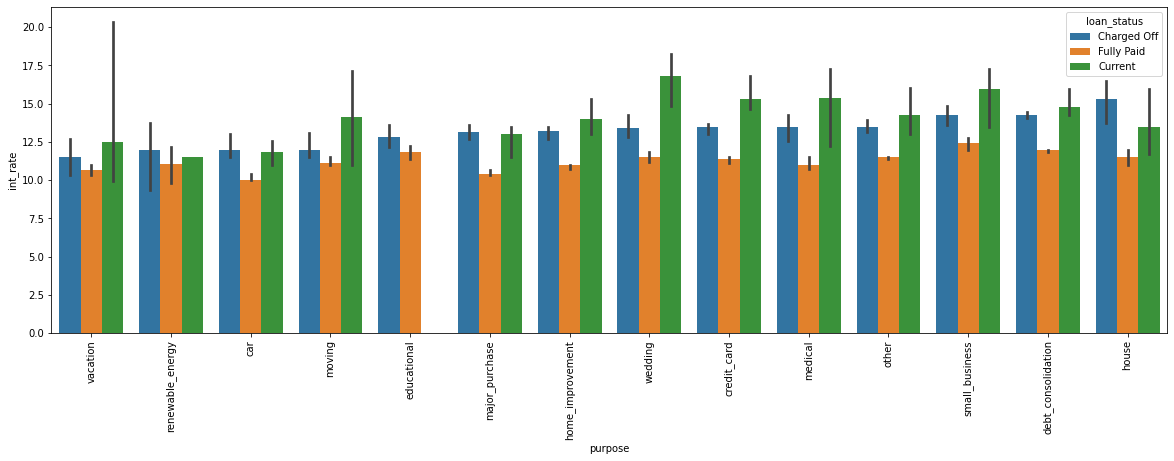

In [547]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose
plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,6))
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= loan, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

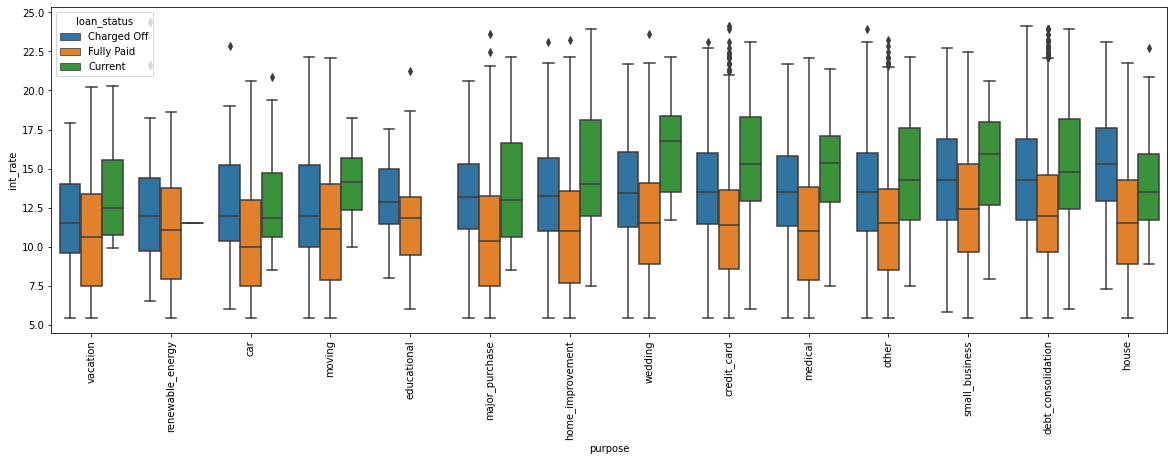

In [548]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose
plt.figure(figsize=(20,6))
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= loan, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

**Observations:**  
Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.

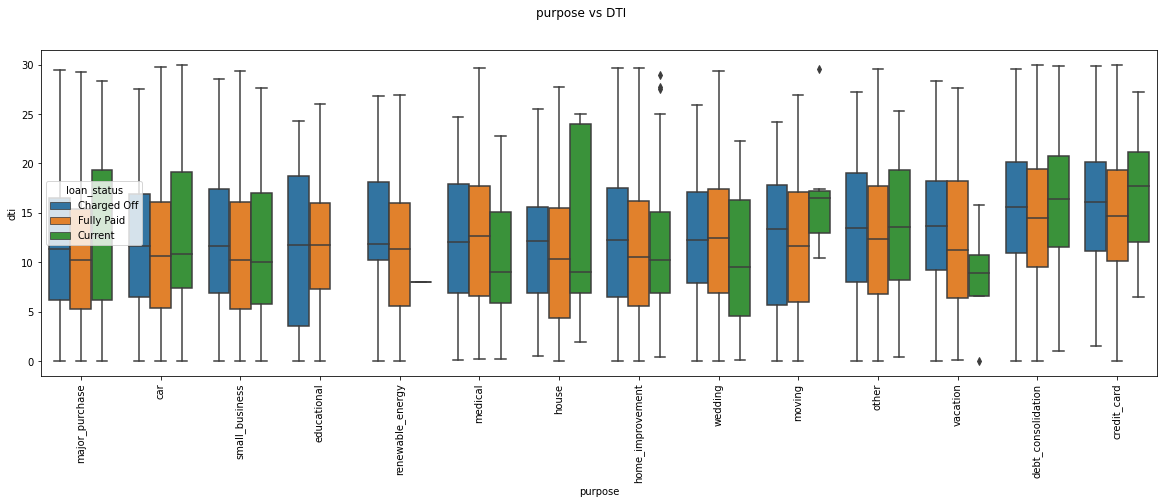

In [549]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose
plt.figure(figsize=(20,6))
plt.suptitle('purpose vs DTI')
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=loan, order=purpose_ord)
plt.xticks(rotation=90)
plt.show()

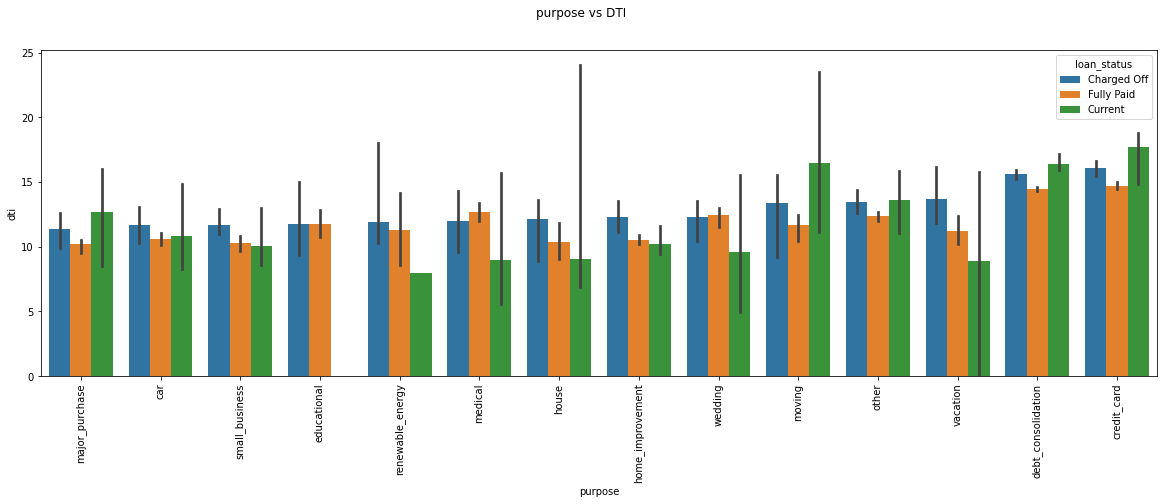

In [550]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose
plt.figure(figsize=(20,6))
plt.suptitle('purpose vs DTI')
sns.barplot(x='purpose', y='dti', hue='loan_status', data=loan, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

**Observations:**  
Could not observe any pattern from the charts

### Loan Amount vs Interest Rate

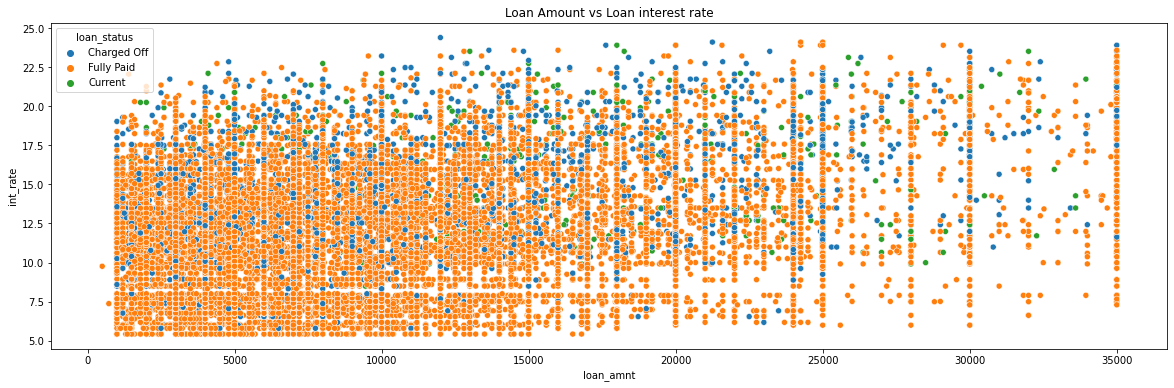

In [551]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

**Observartions**:  
Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

### Loan Amount vs Annual income

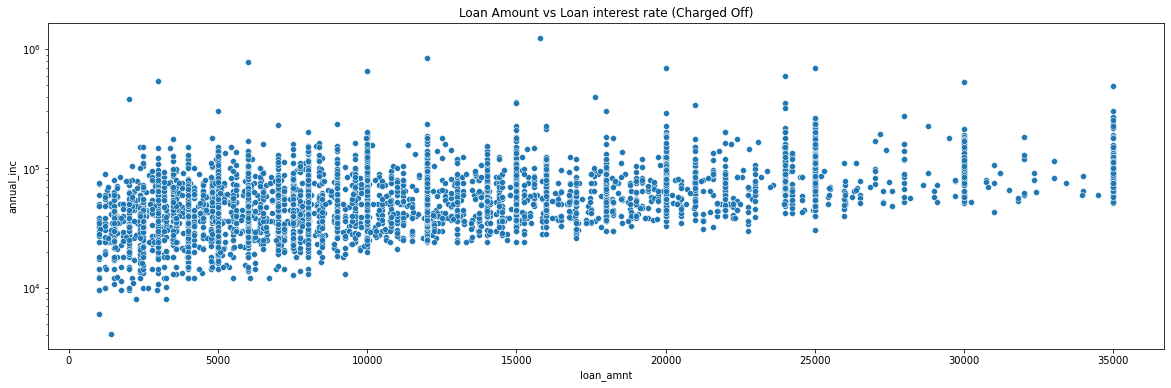

In [552]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan[loan.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.show()

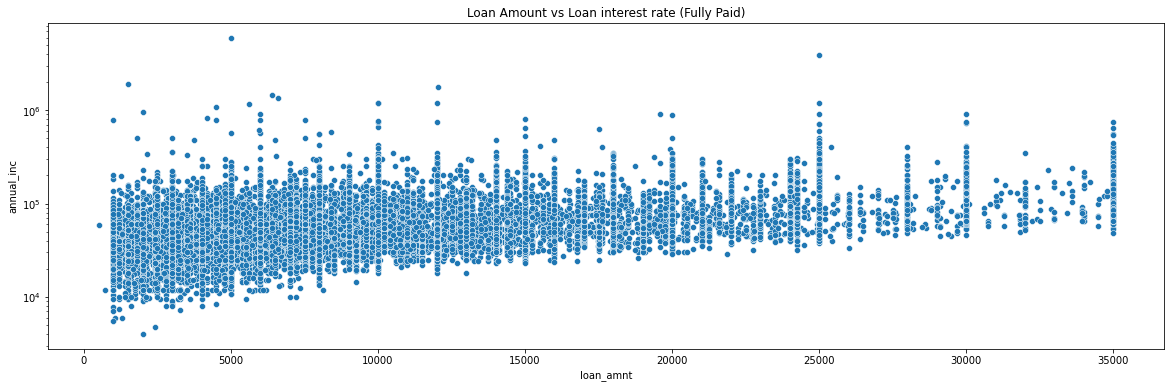

In [553]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan[loan.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

**Observations**  
Both Fully paid and Charged Off loans are having similar pattern versus Annual income. We can fit a linear patter with a line which has very much less slope.

### Loan Amount vs DTI

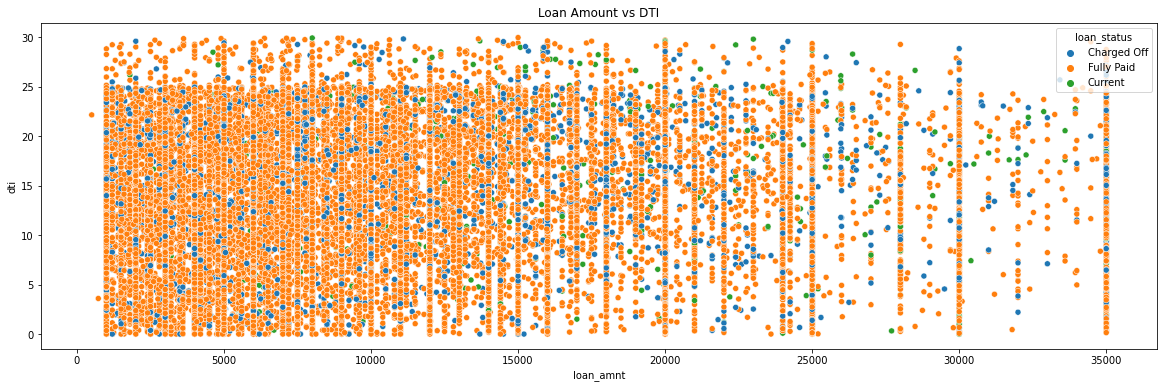

In [554]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=loan, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

**Observartions**:  
Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

### Interest Rate vs DTI

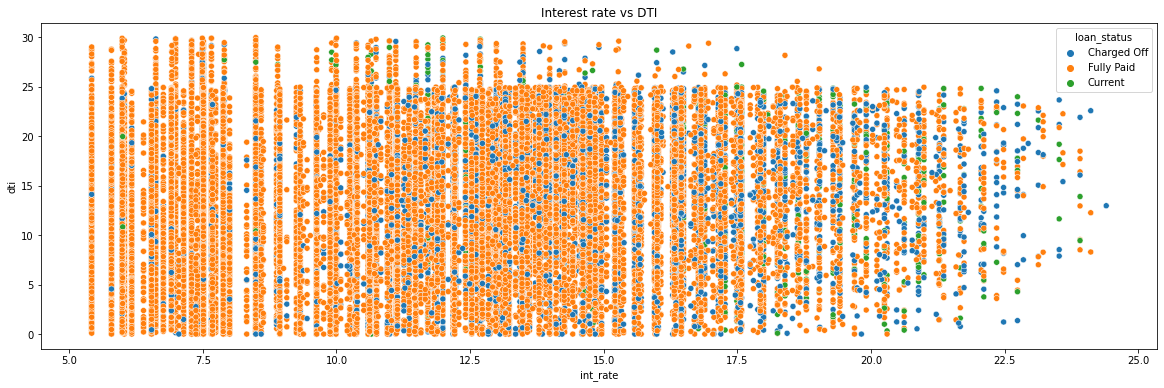

In [555]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=loan, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

**Observations**  
Values are spread all accross, but we can see one thing here irrespective of DTI when interest rates are high charged off loans are high.

### Correlation Matrix

Let's find the correlation between the variables/columns of out data set.

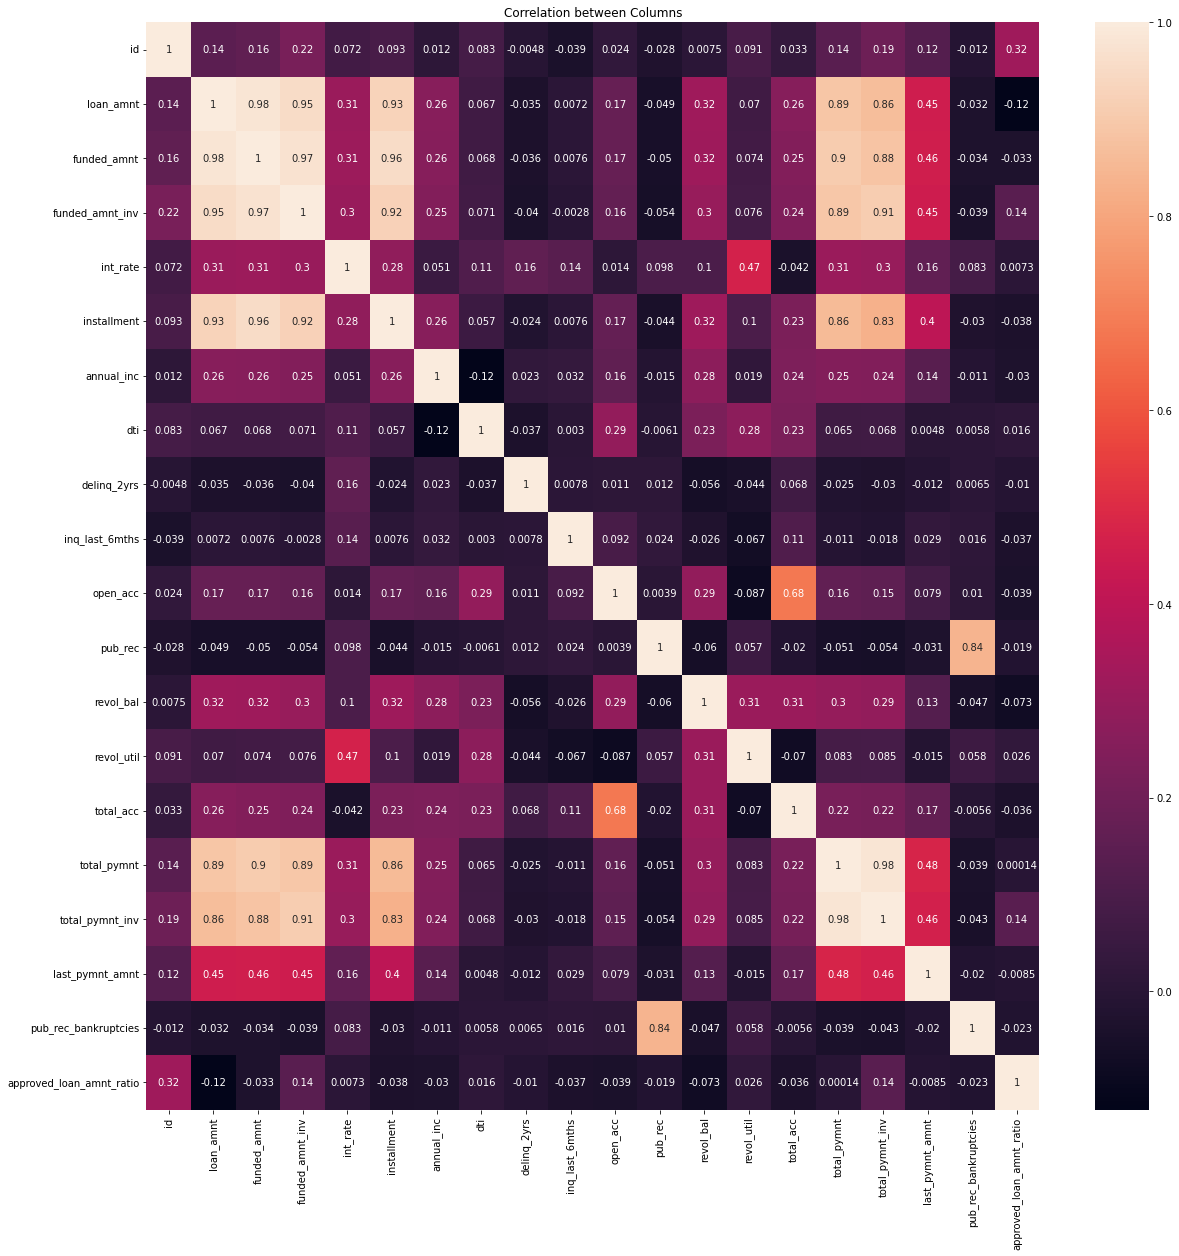

In [556]:
#Finding correlation matric
corr_matrix = loan.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True)
#top, bottom = ax.get_ylim()
#ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

**Observations**:  
* The public derogatory records colummn is highly (+ve) correlated with public bankruptcies records.   
* Interest rates are high for people with high revol utilisation.